https://xang1234.github.io/prophet/
https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea
https://medium.com/analytics-vidhya/what-is-multicollinearity-and-how-to-remove-it-413c419de2f
https://github.com/facebook/prophet/issues/848

#SafeGraph(Latitude and longitude)

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

https://medium.com/the-data-science-publication/how-to-plot-geospatial-data-with-python-d788ee54dcd1



##Data Cleaning

We need to seperate latitude and longitude into seperate columns( POINT( -111.75, 33.29 ), - > Lon: -111.75, Lat: 33.29)

In [ ]:
pip install geopandas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry  import Point, Polygon



In [13]:
safe_graph_df = pd.read_csv('Safegraph_AZ 2.csv')
safe_graph_df.head()


,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


In [14]:
safe_graph_df['tract_trim'] = safe_graph_df['census_tract_centroid'].astype(str).str[6:]
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,tract_trim
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,(-111.75 33.29)
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,(-112.07 33.52)
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,(-112.18 33.6)
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,(-112.26 33.56)
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,(-111.61 33.26)


In [15]:
safe_graph_df['tract_trim'] = safe_graph_df['tract_trim'].replace(to_replace='\(', value="", regex=True)
print(safe_graph_df['tract_trim'])

0         -111.75 33.29)
1         -112.07 33.52)
2          -112.18 33.6)
3         -112.26 33.56)
4         -111.61 33.26)
               ...      
204842     -111.73 33.4)
204843     -112.36 33.5)
204844    -110.97 32.31)
204845    -111.48 34.16)
204846    -111.87 33.31)
Name: tract_trim, Length: 204847, dtype: object


In [16]:
safe_graph_df['tract_trim'] = safe_graph_df['tract_trim'].replace(to_replace='\)', value="", regex=True)
print(safe_graph_df['tract_trim'])

0         -111.75 33.29
1         -112.07 33.52
2          -112.18 33.6
3         -112.26 33.56
4         -111.61 33.26
              ...      
204842     -111.73 33.4
204843     -112.36 33.5
204844    -110.97 32.31
204845    -111.48 34.16
204846    -111.87 33.31
Name: tract_trim, Length: 204847, dtype: object


In [17]:
safe_graph_df['tract_trim'].isnull().sum()

0

In [18]:
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,tract_trim
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75 33.29
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07 33.52
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18 33.6
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26 33.56
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61 33.26


In [ ]:
safe_graph_df['tract_trim'].to_list()

In [20]:
safe_graph_df.dtypes

region                      object
state_id                     int64
county_id                    int64
county_name                 object
census_tract_id              int64
census_tract_centroid       object
naics_category              object
date_range_start            object
date_range_end              object
raw_visit_counts           float64
raw_visitor_counts         float64
active_businesses          float64
total_devices_seen         float64
yago_date_range_start       object
yago_date_range_end         object
yago_raw_visit_counts      float64
yago_raw_visitor_counts    float64
yago_active_businesses     float64
yago_total_devices_seen    float64
rowkey                      object
tract_trim                  object
dtype: object

In [21]:
lonlat = safe_graph_df["tract_trim"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
safe_graph_df["lon"]= lonlat[0]
  
# making separate last name column from new data frame
safe_graph_df["lat"]= lonlat[1]
  
# # Dropping old Name columns
safe_graph_df.drop(columns =["tract_trim"], inplace = True)

In [22]:
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.6
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26


In [23]:
safe_graph_df[['lon', 'lat']]

,lon,lat
0,-111.75,33.29
1,-112.07,33.52
2,-112.18,33.6
3,-112.26,33.56
4,-111.61,33.26
...,...,...
204842,-111.73,33.4
204843,-112.36,33.5
204844,-110.97,32.31
204845,-111.48,34.16


In [24]:
safe_graph_df.dtypes

region                      object
state_id                     int64
county_id                    int64
county_name                 object
census_tract_id              int64
census_tract_centroid       object
naics_category              object
date_range_start            object
date_range_end              object
raw_visit_counts           float64
raw_visitor_counts         float64
active_businesses          float64
total_devices_seen         float64
yago_date_range_start       object
yago_date_range_end         object
yago_raw_visit_counts      float64
yago_raw_visitor_counts    float64
yago_active_businesses     float64
yago_total_devices_seen    float64
rowkey                      object
lon                         object
lat                         object
dtype: object

In [25]:
safe_graph_df
#https://geopandas.org/en/stable/docs/user_guide/projections.html
#cres = {'init'}

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.6
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204842,AZ,4,4013,Maricopa County,4013422607,POINT (-111.73 33.4),Accommodation and Food Services,08/16/2021 12:00:00 AM,08/23/2021 12:00:00 AM,199.0,...,3287985.0,08/10/2020 12:00:00 AM,08/17/2020 12:00:00 AM,166.0,113.0,3.0,1073289.0,04013422607-Accommodation and Food Services-20...,-111.73,33.4
204843,AZ,4,4013,Maricopa County,4013061010,POINT (-112.36 33.5),Finance and Information,08/17/2020 12:00:00 AM,08/24/2020 12:00:00 AM,6.0,...,725354.0,08/19/2019 12:00:00 AM,08/26/2019 12:00:00 AM,3.0,3.0,2.0,772730.0,04013061010-Finance and Information-2020-08-17...,-112.36,33.5
204844,AZ,4,4019,Pima County,4019004725,POINT (-110.97 32.31),Accommodation and Food Services,06/10/2019 12:00:00 AM,06/17/2019 12:00:00 AM,896.0,...,5589045.0,NaN,NaN,NaN,NaN,NaN,NaN,04019004725-Accommodation and Food Services-20...,-110.97,32.31
204845,AZ,4,4007,Gila County,4007000302,POINT (-111.48 34.16),Professional,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04007000302-Professional-NA,-111.48,34.16


In [33]:
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geometry
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,POINT (-111.75000 33.29000)
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,POINT (-112.07000 33.52000)
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.6,POINT (-112.18000 33.60000)
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,POINT (-112.26000 33.56000)
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,POINT (-111.61000 33.26000)


##Reversing and Basic Plotting

Getting the city name from the latitude and longtiude coordinates
https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6

In [ ]:
# import pandas as pd
# import geopandas as gpd
# import geopy
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import tqdm
# from tqdm._tqdm_notebook import tqdm_notebook

In [ ]:
# url = 'https://www.dropbox.com/s/15gisj8hx218rn1/street-pole-sample.csv?dl=1'
# df = pd.read_csv(url)
# df.head()

In [ ]:
# df.dtypes

In [ ]:
# import plotly.express as px
# px.scatter_mapbox(df, lat= 'Y', lon='X', zoom=15)

In [35]:
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geometry
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,POINT (-111.75000 33.29000)
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,POINT (-112.07000 33.52000)
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.6,POINT (-112.18000 33.60000)
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,POINT (-112.26000 33.56000)
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,POINT (-111.61000 33.26000)


In [36]:
safe_graph_df.dtypes

region                       object
state_id                      int64
county_id                     int64
county_name                  object
census_tract_id               int64
census_tract_centroid        object
naics_category               object
date_range_start             object
date_range_end               object
raw_visit_counts            float64
raw_visitor_counts          float64
active_businesses           float64
total_devices_seen          float64
yago_date_range_start        object
yago_date_range_end          object
yago_raw_visit_counts       float64
yago_raw_visitor_counts     float64
yago_active_businesses      float64
yago_total_devices_seen     float64
rowkey                       object
lon                          object
lat                          object
geometry                   geometry
dtype: object

In [37]:
safe_graph_df['lat'] = safe_graph_df['lat'].astype(float)
safe_graph_df['lon'] = safe_graph_df['lon'].astype(float)


In [38]:
safe_graph_df.dtypes

region                       object
state_id                      int64
county_id                     int64
county_name                  object
census_tract_id               int64
census_tract_centroid        object
naics_category               object
date_range_start             object
date_range_end               object
raw_visit_counts            float64
raw_visitor_counts          float64
active_businesses           float64
total_devices_seen          float64
yago_date_range_start        object
yago_date_range_end          object
yago_raw_visit_counts       float64
yago_raw_visitor_counts     float64
yago_active_businesses      float64
yago_total_devices_seen     float64
rowkey                       object
lon                         float64
lat                         float64
geometry                   geometry
dtype: object

In [40]:
pip install plotly

In [39]:
import plotly.express as px
px.scatter_mapbox(safe_graph_df, lat= 'lat', lon='lon', zoom=15)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ! pip install plotly
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.io as pio
# pio.renderers.default = "iframe_connected"

In [ ]:
# safe_graph_df.columns

In [ ]:
# import plotly.express as px
# px.scatter_mapbox(safe_graph_df, lat= 'lat', lon='lon', zoom=15)

In [ ]:
# fig = px.scatter_mapbox(safe_graph_df, lat="lat", lon="lon", zoom=8, mapbox_style="carto-positron")
# fig.show()

cant get the basic graphs to work for some reaspn- look into this

In [ ]:
safe_graph_df['geom'] = safe_graph_df['lat'].map(str) + ', ' + safe_graph_df['lon'].map(str)
safe_graph_df['geom'][0]

'33.29, -111.75'

In [ ]:
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geom
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,"33.29, -111.75"
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,"33.52, -112.07"
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.6,"33.6, -112.18"
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,"33.56, -112.26"
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,"33.26, -111.61"


In [ ]:
safe_graph_df.dtypes

region                      object
state_id                     int64
county_id                    int64
county_name                 object
census_tract_id              int64
census_tract_centroid       object
naics_category              object
date_range_start            object
date_range_end              object
raw_visit_counts           float64
raw_visitor_counts         float64
active_businesses          float64
total_devices_seen         float64
yago_date_range_start       object
yago_date_range_end         object
yago_raw_visit_counts      float64
yago_raw_visitor_counts    float64
yago_active_businesses     float64
yago_total_devices_seen    float64
rowkey                      object
lon                         object
lat                         object
geom                        object
dtype: object

In [ ]:
locator = Nominatim(user_agent= 'myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)


In [ ]:
tqdm.pandas()
safe_graph_df['address'] = safe_graph_df['geom'].progress_apply(rgeocode)
safe_graph_df.head()


https://ecyy.medium.com/geocoding-and-reversegeocoding-by-geopy-in-colab-b8c43f7261f9
method to get address details from lat, lon
***This works!!***

In [28]:
import geopy
from geopy.geocoders import Nominatim

In [ ]:
#reversegeocoder - from xy coordinates to location address
locator = Nominatim(timeout=10, user_agent="my-application")
coordinates = "33.29, -111.75"
location = locator.reverse(coordinates)
print(location.latitude, location.longitude)
print(location.address)

33.287571549999996 -111.75159241330519
Dignity Health Mercy Gilbert Medical Center, 3555, South Val Vista Drive, Gilbert, Maricopa County, Arizona, 85297, United States


In [ ]:
#reversegeocoder - from xy coordinates to location address
locator = Nominatim(timeout=10, user_agent="my-application")
coordinates = safe_graph_df['geom'][0]
location = locator.reverse(coordinates)
print(location.latitude, location.longitude)
print(location.address)

33.287571549999996 -111.75159241330519
Dignity Health Mercy Gilbert Medical Center, 3555, South Val Vista Drive, Gilbert, Maricopa County, Arizona, 85297, United States


In [ ]:
#show the location address structure
location.raw

{'address': {'amenity': 'Dignity Health Mercy Gilbert Medical Center',
  'city': 'Gilbert',
  'country': 'United States',
  'country_code': 'us',
  'county': 'Maricopa County',
  'house_number': '3555',
  'postcode': '85297',
  'road': 'South Val Vista Drive',
  'state': 'Arizona'},
 'boundingbox': ['33.2853214', '33.2899709', '-111.7552177', '-111.7488427'],
 'display_name': 'Dignity Health Mercy Gilbert Medical Center, 3555, South Val Vista Drive, Gilbert, Maricopa County, Arizona, 85297, United States',
 'lat': '33.287571549999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-111.75159241330519',
 'osm_id': 314687342,
 'osm_type': 'way',
 'place_id': 176927019}

In [ ]:
location.raw['display_name']

'Dignity Health Mercy Gilbert Medical Center, 3555, South Val Vista Drive, Gilbert, Maricopa County, Arizona, 85297, United States'

In [ ]:
location.raw['lat']

'33.287571549999996'

In [ ]:
print(location.raw['address']['postcode'])
print(location.raw['address']['city'])
print(location.raw['address']['county'])
print(location.raw['address']['road'])

85297
Gilbert
Maricopa County
South Val Vista Drive


In [ ]:
print(location.raw['address']['city'])

Gilbert


In [ ]:
safe_graph_df

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geom
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,"33.29, -111.75"
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,"33.52, -112.07"
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.6,"33.6, -112.18"
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,"33.56, -112.26"
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,"33.26, -111.61"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48228,AZ,4,4013,Maricopa County,4013319402,POINT (-111.9 33.39),Real Estate and Rental and Leasing,06/29/2020 12:00:00 AM,07/06/2020 12:00:00 AM,9.0,...,07/01/2019 12:00:00 AM,07/08/2019 12:00:00 AM,8.0,8.0,1.0,337629.0,04013319402-Real Estate and Rental and Leasing...,-111.9,33.39,"33.39, -111.9"
48229,AZ,4,4019,Pima County,4019003004,POINT (-110.87 32.26),Information,12/23/2019 12:00:00 AM,12/30/2019 12:00:00 AM,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,04019003004-Information-2019-12-23 00:00:00.000,-110.87,32.26,"32.26, -110.87"
48230,AZ,4,4013,Maricopa County,4013082002,POINT (-112.28 33.5),Finance and Information,10/25/2021 12:00:00 AM,11/01/2021 12:00:00 AM,8.0,...,10/19/2020 12:00:00 AM,10/26/2020 12:00:00 AM,32.0,31.0,3.0,997290.0,04013082002-Finance and Information-2021-10-25...,-112.28,33.5,"33.5, -112.28"
48231,AZ,4,4013,Maricopa County,4013421601,POINT (-111.8 33.42),Real Estate and Rental and Leasing,11/15/2021 12:00:00 AM,11/22/2021 12:00:00 AM,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,04013421601-Real Estate and Rental and Leasing...,-111.8,33.42,"33.42, -111.8"


In [ ]:
# for index, row in safe_graph_df.iterrows():
#   try:
#     #print(row['Estate_Name_en'])
#     # geolocator = Nominatim(timeout=10, user_agent = "my-application")
#     locator = Nominatim(timeout=10, user_agent="my-application")
#     location = locator.reverse(row.geom)
#     print(index, location.latitude, location.longitude)

#   except AttributeError:
#     print('nan')

For loop that will get all the addresses from the latitude and longitude coordinates

In [ ]:
# store_indexes = []

In [ ]:
from logging import NullHandler
for index, row in safe_graph_df.iterrows():
  try:
    #print(row['Estate_Name_en'])
    # geolocator = Nominatim(timeout=10, user_agent = "my-application")
    locator = Nominatim(timeout=10, user_agent="my-application")
    location = locator.reverse(row.geom)


    #Create a condition so that we are only extracting the cities containing mesa. Be careful using contains as it may draw in a city name that is not mesa but contains the word mesa

    # if location.raw['address']['city'].contains('mesa', case = False):
        #store_indexes.append(index)

    print(index, location.latitude, location.longitude)
    print(location.raw)
    

    print("Printing the display name:", location.raw['display_name'])
    # print("Printing the City name:", location.raw['address']['city'])
    # # print("Printing the Village name as there is no city name attached to this coordinate: ", location.raw['address']['village'])

    # print("Printing the County name:", location.raw['address']['county'])
    # print("Printing the PostCode:", location.raw['address']['postcode'])






    # #creating new rows to store information such as city, county, etc
    # safe_graph_df.loc[index,'lon_granular'] = location.longitude
    # safe_graph_df.loc[index, 'lat_granular'] = location.latitude

    safe_graph_df.loc[index,'adress_name'] = location.raw['display_name']
    # # safe_graph_df.loc[index,'address'] = location.raw['address']
    # safe_graph_df.loc[index,'city'] = location.raw['address']['city']
    # safe_graph_df.loc[index,'village'] = location.raw['address']['village']
    # safe_graph_df.loc[index,'county'] = location.raw['address']['county']
    # safe_graph_df.loc[index,'postcode'] = location.raw['address']['postcode']    


  except AttributeError:
    print('nan')

{'place_id': 219863372, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 565172999, 'lat': '32.97995185837211', 'lon': '-111.4981126766898', 'display_name': 'North Kayley Court, Coolidge, Pinal County, Arizona, 85128, United States', 'address': {'road': 'North Kayley Court', 'village': 'Coolidge', 'county': 'Pinal County', 'state': 'Arizona', 'postcode': '85128', 'country': 'United States', 'country_code': 'us'}, 'boundingbox': ['32.9794609', '32.9882507', '-111.4981252', '-111.4978893']}


The problem exists here as there is no city object, but rather there is a village object. Because of this, we are getting an error when we are extracting the city object. Need to figure out how to handle that error in python(if no city object exists than call the village object

In [ ]:
safe_graph_df

In [ ]:
#filter out the datasets that contain the mesa. 
# mesa_df = safe_graph_df['adress_name'].str.contains('mesa', case = False)
# mesa_df.shape

https://www.linkedin.com/pulse/extract-location-details-using-geographical-python-reverse-verma/ 
--Another link for reversing

https://towardsdatascience.com/geocoding-and-reverse-geocoding-using-python-36a6ad275535 - Another Link for Reversing coordinates

##Plotting with the shape file

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
https://data.mesaaz.gov/Information-Technology/City-Boundary/qwhq-nske

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon



In [43]:
#need to unzip the folder that contains all the shape files
!unzip 'City Boundary.zip'


Archive:  City Boundary.zip
  inflating: geo_export_ad33e0c3-ff76-4e8e-9f04-d28d7536dc76.dbf  
  inflating: geo_export_ad33e0c3-ff76-4e8e-9f04-d28d7536dc76.shp  
  inflating: geo_export_ad33e0c3-ff76-4e8e-9f04-d28d7536dc76.shx  
  inflating: geo_export_ad33e0c3-ff76-4e8e-9f04-d28d7536dc76.prj  


In [44]:
crs = {'init' : 'espg:4326'}

In [45]:
#reading in the shape file
street_map_mesa = gpd.read_file('geo_export_ad33e0c3-ff76-4e8e-9f04-d28d7536dc76.shp')
street_map_mesa.head()

,city,date_creat,time_creat,geometry
0,MESA,2013-03-28,00:00:00.000,"POLYGON ((-111.58330 33.27734, -111.59174 33.2..."
1,MESA,2012-10-03,00:00:00.000,"POLYGON ((-111.63690 33.47154, -111.63905 33.4..."
2,MESA,2012-10-03,00:00:00.000,"POLYGON ((-111.65000 33.47159, -111.65095 33.4..."
3,MESA,2012-10-03,00:00:00.000,"POLYGON ((-111.66610 33.47121, -111.66706 33.4..."
4,MESA,2013-03-28,00:00:00.000,"POLYGON ((-111.66654 33.46805, -111.66705 33.4..."


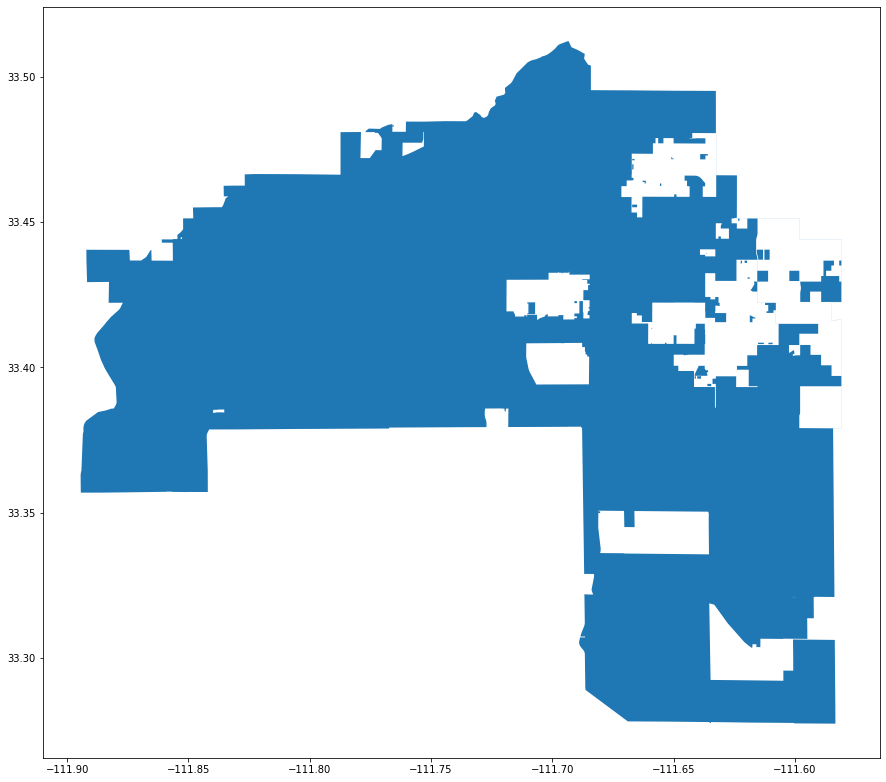

In [46]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map_mesa.plot(ax = ax)

In [47]:
safe_graph_df['lon'] = safe_graph_df['lon'].astype(str).astype(float)
safe_graph_df['lat'] = safe_graph_df['lat'].astype(str).astype(float)
safe_graph_df

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geometry
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,POINT (-111.75000 33.29000)
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,POINT (-112.07000 33.52000)
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.60,POINT (-112.18000 33.60000)
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,POINT (-112.26000 33.56000)
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,POINT (-111.61000 33.26000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204842,AZ,4,4013,Maricopa County,4013422607,POINT (-111.73 33.4),Accommodation and Food Services,08/16/2021 12:00:00 AM,08/23/2021 12:00:00 AM,199.0,...,08/10/2020 12:00:00 AM,08/17/2020 12:00:00 AM,166.0,113.0,3.0,1073289.0,04013422607-Accommodation and Food Services-20...,-111.73,33.40,POINT (-111.73000 33.40000)
204843,AZ,4,4013,Maricopa County,4013061010,POINT (-112.36 33.5),Finance and Information,08/17/2020 12:00:00 AM,08/24/2020 12:00:00 AM,6.0,...,08/19/2019 12:00:00 AM,08/26/2019 12:00:00 AM,3.0,3.0,2.0,772730.0,04013061010-Finance and Information-2020-08-17...,-112.36,33.50,POINT (-112.36000 33.50000)
204844,AZ,4,4019,Pima County,4019004725,POINT (-110.97 32.31),Accommodation and Food Services,06/10/2019 12:00:00 AM,06/17/2019 12:00:00 AM,896.0,...,NaN,NaN,NaN,NaN,NaN,NaN,04019004725-Accommodation and Food Services-20...,-110.97,32.31,POINT (-110.97000 32.31000)
204845,AZ,4,4007,Gila County,4007000302,POINT (-111.48 34.16),Professional,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04007000302-Professional-NA,-111.48,34.16,POINT (-111.48000 34.16000)


In [48]:
safe_graph_df.dtypes

region                       object
state_id                      int64
county_id                     int64
county_name                  object
census_tract_id               int64
census_tract_centroid        object
naics_category               object
date_range_start             object
date_range_end               object
raw_visit_counts            float64
raw_visitor_counts          float64
active_businesses           float64
total_devices_seen          float64
yago_date_range_start        object
yago_date_range_end          object
yago_raw_visit_counts       float64
yago_raw_visitor_counts     float64
yago_active_businesses      float64
yago_total_devices_seen     float64
rowkey                       object
lon                         float64
lat                         float64
geometry                   geometry
dtype: object

In [49]:
geometry = [Point(xy) for xy in zip(safe_graph_df['lat'], safe_graph_df['lon'] )]
geometry[:3]

In [63]:
geo_df = gpd.GeoDataFrame(safe_graph_df,
                          crs = crs,
                          geometry = geometry)
geo_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geometry
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,POINT (33.290 -111.750)
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,POINT (33.520 -112.070)
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.60,POINT (33.600 -112.180)
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,POINT (33.560 -112.260)
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,POINT (33.260 -111.610)


No handles with labels found to put in legend.


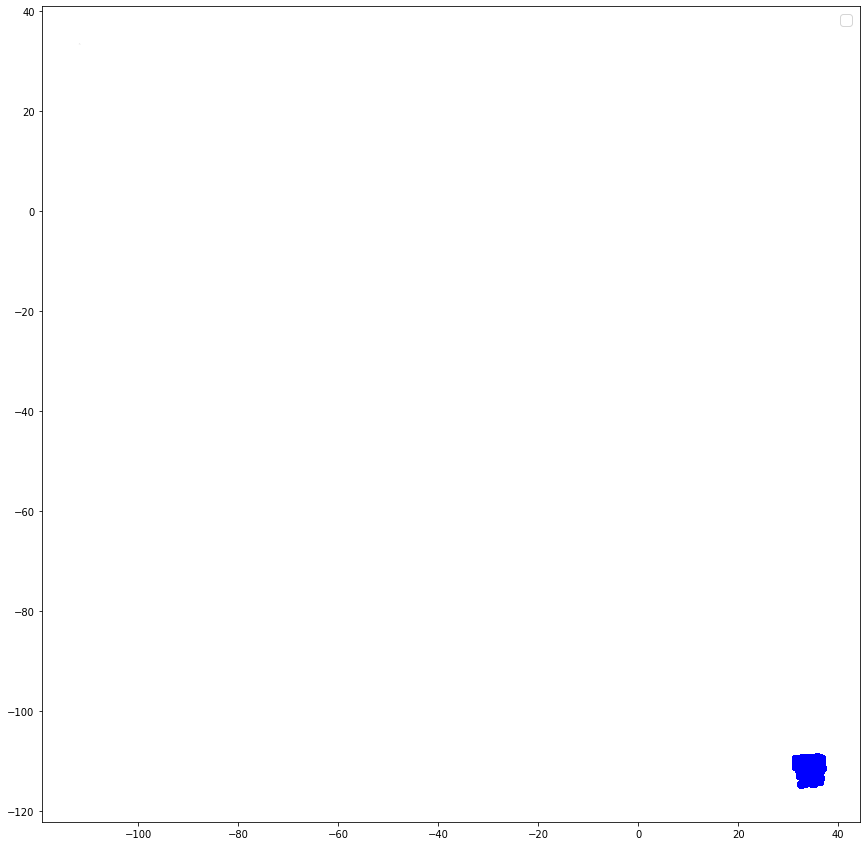

In [65]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map_mesa.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersie = 18, color = 'blue', marker = 'o')
plt.legend(prop = {'size': 15})

https://medium.com/the-data-science-publication/how-to-plot-geospatial-data-with-python-d788ee54dcd1

Plotting a point map(Another method)

In [51]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,lon,lat,geometry
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,-111.75,33.29,POINT (-111.75000 33.29000)
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,-112.07,33.52,POINT (-112.07000 33.52000)
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,-112.18,33.60,POINT (-112.18000 33.60000)
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,-112.26,33.56,POINT (-112.26000 33.56000)
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,-111.61,33.26,POINT (-111.61000 33.26000)


In [ ]:
#WE need to find the city latitude and longitude boreders

In [52]:
lon_min = safe_graph_df['lon'].min()
lon_max  =  safe_graph_df['lon'].max()
lat_min = safe_graph_df['lat'].min()
lat_max = safe_graph_df['lat'].max()


In [53]:
city_long_border =(lon_min, lon_max )
city_lat_border = (lat_min, lat_max)

print(city_long_border)
print(city_lat_border)

(-114.78, -109.13)
(31.34, 36.91)


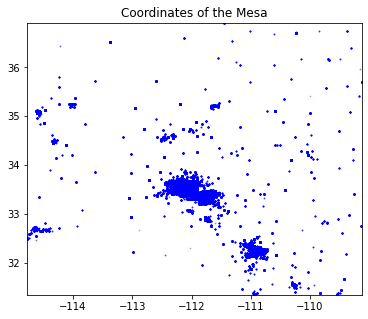

In [54]:
# city_long_border = (-74.03, -73.75)
# city_lat_border = (40.63, 40.85)
ax = plt.scatter(safe_graph_df['lon'].values, safe_graph_df['lat'].values, color='blue', s=0.5, label='train', alpha=0.1)
ax.axes.set_title('Coordinates of the Mesa')
ax.figure.set_size_inches(6,5)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [55]:
safe_graph_df['naics_category'].value_counts()

Retail Trade                                                                21351
Other Services (except Public Administration)                               20132
Arts                                                                        19525
Accommodation and Food Services                                             19254
Health Care and Social Assistance                                           19234
Educational Services                                                        16342
Real Estate and Rental and Leasing                                          12891
Finance and Information                                                     12820
Professional                                                                 9870
Wholesale Trade                                                              8666
Utilities                                                                    8619
Transport and Warehousing                                                    8246
Construction    

In [56]:
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D

In [57]:
groups = safe_graph_df.groupby('naics_category')
groups

(-114.78, -109.13)

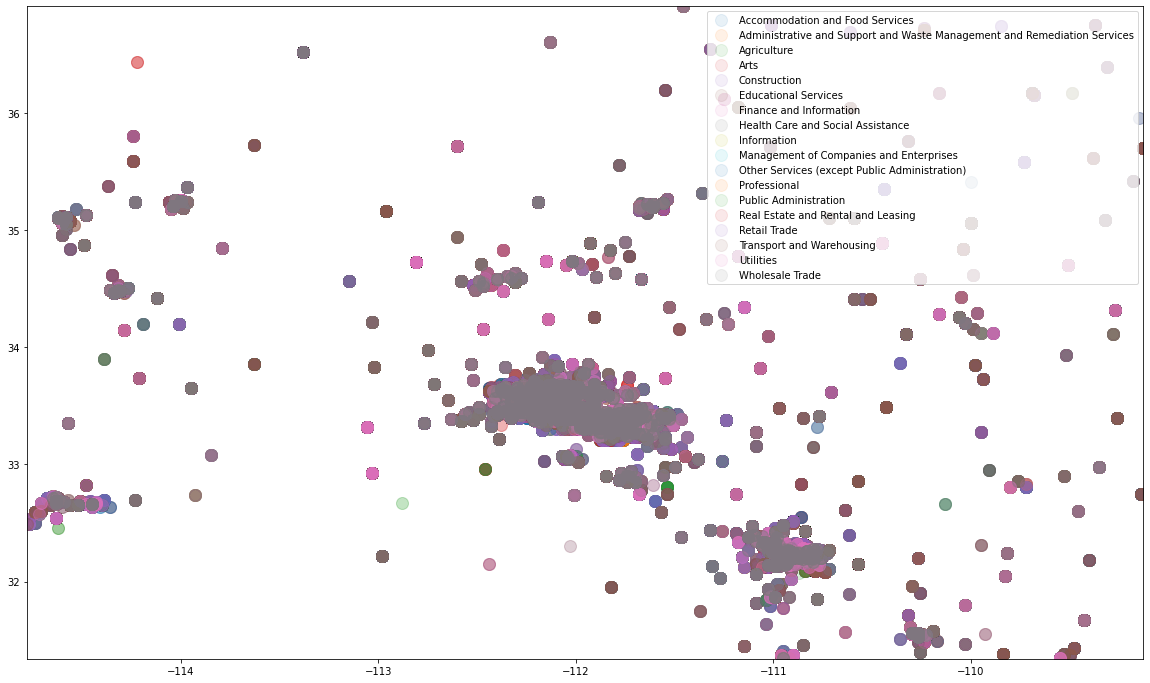

In [58]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.lon, group.lat, marker='o', linestyle='', ms=12, label=name, alpha=0.1)
ax.legend()
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [60]:
def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)

No handles with labels found to put in legend.


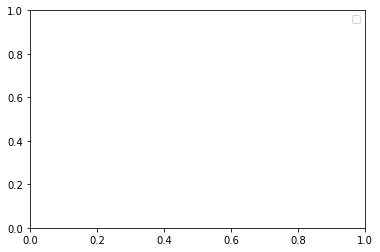

In [61]:
plt.legend(handler_map={PathCollection : HandlerPathCollection(update_func= update), plt.Line2D : HandlerLine2D(update_func = update)})
    
plt.show()

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
safe_graph_df.head()

In [ ]:
BBox = [safe_graph_df.lon.min(),   safe_graph_df.lon.max(),      
         safe_graph_df.lat.min(), safe_graph_df.lat.max()]

In [ ]:
print(BBox)

Go to opestreetmap.org website and export the desired map as an image by first entering the bounding box data. I did the same as explained in the below image (more details are mentioned here as well: steps to export a map image).

In [ ]:
ruh_m = plt.imread('C:/.. … /Riyadh_map.png')


In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(safe_graph_df.lon, safe_graph_df.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Thoughts/Notes:
What valuable numeric information can we plot? We can color the points by which category it is. for this lets change the na values in that column to UNKNOWN



https://walker-data.com/geog30323/slides/geographic/#/11

In [3]:
!pip install --upgrade geopandas

Not sure what to set crs to? Where to find that information

In [31]:
import geopandas as gp

mesageo = gp.GeoDataFrame(safe_graph_df,
                        geometry = gp.points_from_xy(safe_graph_df.lon,
                                                     safe_graph_df.lat),
                        crs = 4326) #Change the value of crs to match mesa


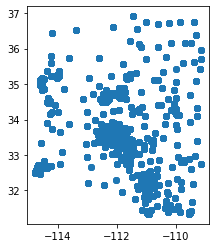

In [32]:
mesageo.plot()

In [4]:
!pip install --upgrade contextily


In [ ]:
import contextily as cx


#Getting Census Ids

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('Mesa_Census_Tracts_To_City_Boundary.csv')
df.head()

,Name,City,Creation Date,Geometry
0,Census Tract 4210.01,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.839957 33.426032, -111.83..."
1,Census Tract 4226.22,MESA,03/28/2013 12:00:00 AM,MULTIPOLYGON (((-111.68802956377323 33.3791902...
2,Census Tract 4226.24,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.736436 33.41077, -111.736..."
3,Census Tract 4201.09,MESA,10/03/2012 12:00:00 AM,MULTIPOLYGON (((-111.66505464128923 33.4550605...
4,Census Tract 4201.09,MESA,10/03/2012 12:00:00 AM,MULTIPOLYGON (((-111.65560422477364 33.4623729...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           165 non-null    object
 1   City           165 non-null    object
 2   Creation Date  165 non-null    object
 3   Geometry       165 non-null    object
dtypes: object(4)
memory usage: 5.3+ KB


In [ ]:
df.describe()

,Name,City,Creation Date,Geometry
count,165,165,165,165
unique,141,1,7,165
top,Census Tract 4201.08,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.839957 33.426032, -111.83..."
freq,5,165,142,1


In [ ]:
df.dtypes

Name             object
City             object
Creation Date    object
Geometry         object
dtype: object

In [ ]:
df

,Name,City,Creation Date,Geometry
0,Census Tract 4210.01,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.839957 33.426032, -111.83..."
1,Census Tract 4226.22,MESA,03/28/2013 12:00:00 AM,MULTIPOLYGON (((-111.68802956377323 33.3791902...
2,Census Tract 4226.24,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.736436 33.41077, -111.736..."
3,Census Tract 4201.09,MESA,10/03/2012 12:00:00 AM,MULTIPOLYGON (((-111.66505464128923 33.4550605...
4,Census Tract 4201.09,MESA,10/03/2012 12:00:00 AM,MULTIPOLYGON (((-111.65560422477364 33.4623729...
...,...,...,...,...
160,Census Tract 4226.10,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.667514 33.395933, -111.66..."
161,Census Tract 4202.06,MESA,03/28/2013 12:00:00 AM,MULTIPOLYGON (((-111.71681496395486 33.4980119...
162,Census Tract 4215.02,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.822923 33.41724, -111.822..."
163,Census Tract 4214,MESA,03/28/2013 12:00:00 AM,"MULTIPOLYGON (((-111.83998199999999 33.408175,..."


We need to make sure the creation date is before nay of our data in the third party data\

In [ ]:
df['Creation Date'] = pd.to_datetime(df['Creation Date'])
df.head()

,Name,City,Creation Date,Geometry
0,Census Tract 4210.01,MESA,2013-03-28,"MULTIPOLYGON (((-111.839957 33.426032, -111.83..."
1,Census Tract 4226.22,MESA,2013-03-28,MULTIPOLYGON (((-111.68802956377323 33.3791902...
2,Census Tract 4226.24,MESA,2013-03-28,"MULTIPOLYGON (((-111.736436 33.41077, -111.736..."
3,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.66505464128923 33.4550605...
4,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.65560422477364 33.4623729...


In [ ]:
df.sort_values('Creation Date').head()

,Name,City,Creation Date,Geometry
68,Census Tract 4201.08,MESA,2012-10-03,MULTIPOLYGON (((-111.65000298081071 33.4715920...
67,Census Tract 4201.08,MESA,2012-10-03,MULTIPOLYGON (((-111.66610478868121 33.4712123...
69,Census Tract 4201.08,MESA,2012-10-03,MULTIPOLYGON (((-111.63689701201677 33.4715391...
34,Census Tract 4201.15,MESA,2012-10-03,MULTIPOLYGON (((-111.6185964500502 33.41549471...
73,Census Tract 4201.11,MESA,2012-10-03,MULTIPOLYGON (((-111.6185618407118 33.43049607...


In [ ]:
df.sort_values('Creation Date').tail()

,Name,City,Creation Date,Geometry
141,Census Tract 4201.10,MESA,2013-04-15,MULTIPOLYGON (((-111.61313551368637 33.4370177...
83,Census Tract 4226.32,MESA,2013-06-26,MULTIPOLYGON (((-111.63971098040356 33.4004943...
140,Census Tract 4201.10,MESA,2014-03-10,MULTIPOLYGON (((-111.59817764838945 33.4332081...
139,Census Tract 4201.10,MESA,2014-09-08,MULTIPOLYGON (((-111.61255997539513 33.4404653...
72,Census Tract 4201.11,MESA,2016-09-19,MULTIPOLYGON (((-111.61971382430333 33.4366548...


In [ ]:
df['Name'].unique()

array(['Census Tract 4210.01', 'Census Tract 4226.22',
       'Census Tract 4226.24', 'Census Tract 4201.09',
       'Census Tract 4225.13', 'Census Tract 4202.02',
       'Census Tract 4202.07', 'Census Tract 4202.08',
       'Census Tract 4202.09', 'Census Tract 3194.04',
       'Census Tract 4202.10', 'Census Tract 4202.11',
       'Census Tract 4202.12', 'Census Tract 4203.01',
       'Census Tract 4203.02', 'Census Tract 4203.03',
       'Census Tract 4203.04', 'Census Tract 4205.01',
       'Census Tract 4220.01', 'Census Tract 4220.02',
       'Census Tract 4226.16', 'Census Tract 4226.17',
       'Census Tract 4226.15', 'Census Tract 4226.18',
       'Census Tract 5228', 'Census Tract 8156', 'Census Tract 4226.41',
       'Census Tract 4226.42', 'Census Tract 4226.43',
       'Census Tract 4226.44', 'Census Tract 9806',
       'Census Tract 4226.46', 'Census Tract 4201.15',
       'Census Tract 4201.16', 'Census Tract 4202.14',
       'Census Tract 4202.15', 'Census Tract 4207.

In [ ]:
#removing the 'Census Tract', so that we are only left with numbers with the decimal
df['cleaned_Name'] = df['Name'].astype(str).str[13:]
df['cleaned_Name'].unique()

array(['4210.01', '4226.22', '4226.24', '4201.09', '4225.13', '4202.02',
       '4202.07', '4202.08', '4202.09', '3194.04', '4202.10', '4202.11',
       '4202.12', '4203.01', '4203.02', '4203.03', '4203.04', '4205.01',
       '4220.01', '4220.02', '4226.16', '4226.17', '4226.15', '4226.18',
       '5228', '8156', '4226.41', '4226.42', '4226.43', '4226.44', '9806',
       '4226.46', '4201.15', '4201.16', '4202.14', '4202.15', '4207.07',
       '8169', '4207.08', '4207.09', '4207.10', '4213.03', '4217.01',
       '4217.02', '4222.21', '4222.22', '4226.25', '4226.26', '4226.27',
       '4226.28', '4226.29', '4226.30', '4226.33', '4226.35', '4226.39',
       '4205.03', '4213.04', '4201.07', '4201.08', '4201.11', '4201.12',
       '4201.14', '4202.16', '4204.01', '4205.04', '3.19', '4226.31',
       '4226.32', '8152', '4226.36', '4226.37', '4221.05', '4204.02',
       '4226.38', '4226.40', '4211.02', '4218.01', '4218.02', '4219.02',
       '4213.02', '4212.02', '3199.04', '3199.06', '2.04',

In [ ]:
#get rid of the decimal calues
df['cleaned_Name'] = df['cleaned_Name'].str.replace(".", '')
df['cleaned_Name'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


array(['421001', '422622', '422624', '420109', '422513', '420202',
       '420207', '420208', '420209', '319404', '420210', '420211',
       '420212', '420301', '420302', '420303', '420304', '420501',
       '422001', '422002', '422616', '422617', '422615', '422618', '5228',
       '8156', '422641', '422642', '422643', '422644', '9806', '422646',
       '420115', '420116', '420214', '420215', '420707', '8169', '420708',
       '420709', '420710', '421303', '421701', '421702', '422221',
       '422222', '422625', '422626', '422627', '422628', '422629',
       '422630', '422633', '422635', '422639', '420503', '421304',
       '420107', '420108', '420111', '420112', '420114', '420216',
       '420401', '420504', '319', '422631', '422632', '8152', '422636',
       '422637', '422105', '420402', '422638', '422640', '421102',
       '421801', '421802', '421902', '421302', '421202', '319904',
       '319906', '204', '422102', '422103', '422104', '422106', '422107',
       '422203', '422204', '

In [ ]:
#now we want to keep all the values that are 6 digits long, and for ones that are not 6 digits long we will store as NaN values
df['cleaned_Name'] = (df['cleaned_Name'].str.extract('^(\d{6})$', expand=False).fillna('NaN'))
df

,Name,City,Creation Date,Geometry,cleaned_Name
0,Census Tract 4210.01,MESA,2013-03-28,"MULTIPOLYGON (((-111.839957 33.426032, -111.83...",421001
1,Census Tract 4226.22,MESA,2013-03-28,MULTIPOLYGON (((-111.68802956377323 33.3791902...,422622
2,Census Tract 4226.24,MESA,2013-03-28,"MULTIPOLYGON (((-111.736436 33.41077, -111.736...",422624
3,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.66505464128923 33.4550605...,420109
4,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.65560422477364 33.4623729...,420109
...,...,...,...,...,...
160,Census Tract 4226.10,MESA,2013-03-28,"MULTIPOLYGON (((-111.667514 33.395933, -111.66...",422610
161,Census Tract 4202.06,MESA,2013-03-28,MULTIPOLYGON (((-111.71681496395486 33.4980119...,420206
162,Census Tract 4215.02,MESA,2013-03-28,"MULTIPOLYGON (((-111.822923 33.41724, -111.822...",421502
163,Census Tract 4214,MESA,2013-03-28,"MULTIPOLYGON (((-111.83998199999999 33.408175,...",NaN


In [ ]:
df.shape

(165, 5)

In [ ]:
#removing all the null values 
filtered_df = df[~(df['cleaned_Name'] =='NaN')]
filtered_df.shape

(152, 5)

In [ ]:
filtered_df.head()

,Name,City,Creation Date,Geometry,cleaned_Name
0,Census Tract 4210.01,MESA,2013-03-28,"MULTIPOLYGON (((-111.839957 33.426032, -111.83...",421001
1,Census Tract 4226.22,MESA,2013-03-28,MULTIPOLYGON (((-111.68802956377323 33.3791902...,422622
2,Census Tract 4226.24,MESA,2013-03-28,"MULTIPOLYGON (((-111.736436 33.41077, -111.736...",422624
3,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.66505464128923 33.4550605...,420109
4,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.65560422477364 33.4623729...,420109


In [ ]:
filtered_df.dtypes

Name                     object
City                     object
Creation Date    datetime64[ns]
Geometry                 object
cleaned_Name             object
dtype: object

In [ ]:
filtered_df["cleaned_Name"] = filtered_df.cleaned_Name.astype(int)
filtered_df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Name                     object
City                     object
Creation Date    datetime64[ns]
Geometry                 object
cleaned_Name              int64
dtype: object

In [ ]:
filtered_df.head()

,Name,City,Creation Date,Geometry,cleaned_Name
0,Census Tract 4210.01,MESA,2013-03-28,"MULTIPOLYGON (((-111.839957 33.426032, -111.83...",421001
1,Census Tract 4226.22,MESA,2013-03-28,MULTIPOLYGON (((-111.68802956377323 33.3791902...,422622
2,Census Tract 4226.24,MESA,2013-03-28,"MULTIPOLYGON (((-111.736436 33.41077, -111.736...",422624
3,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.66505464128923 33.4550605...,420109
4,Census Tract 4201.09,MESA,2012-10-03,MULTIPOLYGON (((-111.65560422477364 33.4623729...,420109


In [ ]:
meza_census_ids = filtered_df['cleaned_Name'].astype(str).to_list()
print(meza_census_ids)

['421001', '422622', '422624', '420109', '420109', '420109', '422513', '420202', '420207', '420208', '420209', '319404', '420210', '420211', '420212', '420301', '420302', '420303', '420304', '420501', '422001', '422002', '422616', '422617', '422615', '422618', '422641', '422642', '422643', '422644', '422646', '420115', '420115', '420116', '420214', '420214', '420214', '420215', '420707', '420708', '420709', '420710', '421303', '421701', '421702', '422221', '422222', '422625', '422626', '422627', '422627', '422628', '422628', '422628', '422629', '422630', '422633', '422635', '422639', '420503', '421304', '420107', '420108', '420108', '420108', '420108', '420108', '420109', '420111', '420111', '420111', '420111', '420112', '420114', '420216', '420401', '420504', '422631', '422632', '422632', '422632', '422632', '422632', '422636', '422637', '422105', '420402', '422638', '422640', '421102', '421801', '421802', '421902', '421302', '421202', '319904', '319906', '422102', '422103', '422104',

In [ ]:
print(len(meza_census_ids))

152


In [ ]:
type(meza_census_ids)

list

From each dataset that we are using we need to determine which third party regressors to use from each dataset. Once we have found which regressors we are using, we would want to aggregate them on a monthly basis. 

 All future values must either be known, as with holidays, or must have been forecast themselves separately. You must be careful though when building a forecast using data that itself has been forecast: the error in the first forecast will compound the error in the second forecast, and the errors will continuously pile up.

We can use both continuous and discrete vairables as regressors. 

https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

Using the list of census tract ID that hannah gave

In [ ]:
census_lists = ['04013420108', '04013422635', '04013420116', '04013420110', '04013422637', '04013422615', '04013422616', '04013420209', '04013816900', '04013815200', '04013422644', '04013422216', '04013422630', '04013422638', '04013420104', '04013420115', '04013422626', '04013420208', '04013420214', '04013941300', '04013420401', '04013817600', '04013420111', '04013422632', '04013422643', '04013422627', '04013420112', '04013420105', '04013420202', '04013420114', '04013422628', '04013422629', '04013420109', '04013422631', '04013422301', '04013422641', '04013422217', '04013422636', '04013422639', '04013421201', '04013318400', '04013420402', '04013421101', '04013421001', '04013421601', '04013421400', '04013421002', '04013422610', '04013422607', '04013420302', '04013422618', '04013420603', '04013420211', '04013421702', '04013422105', '04013420709', '04013421801', '04013420705', '04013421802', '04013420301', '04013422204', '04013421302', '04013421501', '04013420708', '04013422302', '04013420901', '04013422504', '04013422625', '04013420210', '04013420216', '04013420707', '04013422213', '04013422624', '04013422222', '04013522800', '04013421901', '04013420604', '04013422107', '04013420800', '04013422634', '04013422104', '04013420212', '04013421202', '04013422106', '04013422203', '04013420215', '04013420113', '04013420710', '04013422103', '04013422002', '04013420503', '04013420207', '04013420303', '04013420304', '04013420504', '04013422205', '04013422102', '04013421701', '04013422502', '04013422646', '04013421303', '04013421902', '04013420107', '04013422642', '04013422514', '04013420706', '04013422640', '04013422215', '04013420213', '04013420501', '04013422501', '04013421602', '04013422633', '04013422617', '04013422503', '04013420602', '04013422001', '04013421304', '04013422609', '04013420902', '04013421502', '04013422221', '04013420704', '04013422212', '04013980600', '04013420206', '04013421102', '04013422513']

In [ ]:
print(len(census_lists))

128


This list has 128 values whereas the other list has 152 values

In [ ]:
print(type(census_lists))

<class 'list'>


#Reading in the Mesa Dataset

In [ ]:
import pandas as pd

mesa_df = pd.read_csv('Mesa_Arizona_Month_by_month.csv')
mesa_df.head()

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
0,07/01/2015 12:00:00 AM,2015,Jul,201507,TLT,NaN,NaN,TLT,TLT,159234.43,159234.43
1,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,10,Restaurants and Bars,1004732.95,1004732.95
2,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,11,Amusements,127152.32,127152.32
3,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,12,Rentals,1913641.89,1913641.91
4,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,15,Miscellaneous,38591.32,38591.32


In [ ]:
mesa_df = mesa_df.drop(['Business Class', 'Business Class Description'], axis = 1)
mesa_df.head()

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Category,Category Code Description,Amount,Comparable Amount
0,07/01/2015 12:00:00 AM,2015,Jul,201507,TLT,TLT,TLT,159234.43,159234.43
1,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,10,Restaurants and Bars,1004732.95,1004732.95
2,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,11,Amusements,127152.32,127152.32
3,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,12,Rentals,1913641.89,1913641.91
4,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,15,Miscellaneous,38591.32,38591.32


In [ ]:
mesa_df.isnull().sum()

Report Month Date            0
Report Month Year            0
Report Month Name            0
Report Year Month            0
Tax Type                     0
Category                     0
Category Code Description    0
Amount                       0
Comparable Amount            0
dtype: int64

In [ ]:
#Extracting the month number
mesa_df['Month Number'] = mesa_df['Report Year Month'].astype(str).str[4:]

In [ ]:
#Extracting the Year-Month
mesa_df['Year-Month'] = mesa_df['Report Month Year'].astype(str) + '-' + mesa_df['Month Number'].astype(str)
mesa_df.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Category,Category Code Description,Amount,Comparable Amount,Month Number,Year-Month
0,07/01/2015 12:00:00 AM,2015,Jul,201507,TLT,TLT,TLT,159234.43,159234.43,07,2015-07
1,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,10,Restaurants and Bars,1004732.95,1004732.95,07,2015-07


In [ ]:
meza_total_monthly = mesa_df.groupby('Year-Month', as_index = False)['Amount'].sum()
meza_total_monthly.head()

,Year-Month,Amount
0,2015-07,11938700.80
1,2015-08,11974648.06
2,2015-09,11986411.59
3,2015-10,12225716.45
4,2015-11,12408690.93


In [ ]:
# list_of_mesa_counties = [04013420108, 04013422635, 04013420116, 04013420110, 04013422637, 04013422615, 04013422616, 04013420209, 04013816900, 04013815200, 04013422644, 04013422216, 04013422630, 04013422638, 04013420104, 04013420115, 04013422626, 04013420208, 04013420214, 04013941300, 04013420401, 04013817600, 04013420111, 04013422632, 04013422643, 04013422627, 04013420112, 04013420105, 04013420202, 04013420114, 04013422628, 04013422629, 04013420109, 04013422631, 04013422301, 04013422641, 04013422217, 04013422636, 04013422639, 04013421201, 04013318400, 04013420402, 04013421101, 04013421001, 04013421601, 04013421400, 04013421002, 04013422610, 04013422607, 04013420302, 04013422618, 04013420603, 04013420211, 04013421702, 04013422105, 04013420709, 04013421801, 04013420705, 04013421802, 04013420301, 04013422204, 04013421302, 04013421501, 04013420708, 04013422302, 04013420901, 04013422504, 04013422625, 04013420210, 04013420216, 04013420707, 04013422213, 04013422624, 04013422222, 04013522800, 04013421901, 04013420604, 04013422107, 04013420800, 04013422634, 04013422104, 04013420212, 04013421202, 04013422106, 04013422203, 04013420215, 04013420113, 04013420710, 04013422103, 04013422002, 04013420503, 04013420207, 04013420303, 04013420304, 04013420504, 04013422205, 04013422102, 04013421701, 04013422502, 04013422646, 04013421303, 04013421902, 04013420107, 04013422642, 04013422514, 04013420706, 04013422640, 04013422215, 04013420213, 04013420501, 04013422501, 04013421602, 04013422633, 04013422617, 04013422503, 04013420602, 04013422001, 04013421304, 04013422609, 04013420902, 04013421502, 04013422221, 04013420704, 04013422212, 04013980600, 04013420206, 04013421102, 04013422513]
# # complete_list_mesa = list_meza + list_of_mesa_counties

Need to figure out how to convert these string values unto integers while deepingthe leading zeros

In [ ]:
# from pandas._libs.lib import astype_intsafe
# complete_list_mesa.astype(str)

In [ ]:
# print(complete_list_mesa)

In [ ]:
#making them into an int 
# complete_list_mesa = [int(censusid) for censusid in complete_list_mesa]
# print(complete_list_mesa)

#Affinity(NOT Using)

Need more research and business knowledge of the dataset to see if it can be implemented

In [ ]:
import pandas as pd


In [ ]:
aff_df = pd.read_csv('Affinity_County_Data_V2.csv')
aff_df.head()

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129.0,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129
1,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48129.0,Donley County,POINT (-100.81 34.97),Texas,TX,663.40,6.0,NaN,NaN,NaN,2020-01-06-AAP-48129
2,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48083.0,Coleman County,POINT (-99.45 31.77),Texas,TX,270.89,6.0,NaN,NaN,NaN,2020-01-06-AAP-48083
3,01/06/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",21083.0,Graves County,POINT (-88.65 36.72),Kentucky,KY,572.85,6.0,NaN,NaN,NaN,2020-01-06-AER-21083
4,01/06/2020 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",48215.0,Hidalgo County,POINT (-98.18 26.4),Texas,TX,2094.47,18.0,01/07/2019 12:00:00 AM,581.29,18.0,2020-01-06-AFH-48215


In [ ]:
aff_df.shape

(43521, 14)

In [ ]:
aff_df.head()

,transaction_week_starting_date,mcc_aggregate_code,mcc_aggregate_description,cardholder_county_fips,cardholder_county_name,cardholder_county_centroid,cardholder_state_name,cardholder_state_code,total_spend,total_cards,yago_transaction_week_starting_date,yago_total_spend,yago_total_cards,RowID
0,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,26129.0,Ogemaw County,POINT (-84.13 44.33),Michigan,MI,1145.15,19.0,01/07/2019 12:00:00 AM,2475.18,26.0,2020-01-06-AAP-26129
1,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48129.0,Donley County,POINT (-100.81 34.97),Texas,TX,663.40,6.0,NaN,NaN,NaN,2020-01-06-AAP-48129
2,01/06/2020 12:00:00 AM,AAP,Apparel and Accessories,48083.0,Coleman County,POINT (-99.45 31.77),Texas,TX,270.89,6.0,NaN,NaN,NaN,2020-01-06-AAP-48083
3,01/06/2020 12:00:00 AM,AER,"Arts, Entertainment, Recreation",21083.0,Graves County,POINT (-88.65 36.72),Kentucky,KY,572.85,6.0,NaN,NaN,NaN,2020-01-06-AER-21083
4,01/06/2020 12:00:00 AM,AFH,"Agriculture, Forestry/Fishing, Hunting",48215.0,Hidalgo County,POINT (-98.18 26.4),Texas,TX,2094.47,18.0,01/07/2019 12:00:00 AM,581.29,18.0,2020-01-06-AFH-48215


Could we use mcc_aggregate_description as a binary regressor? We would just need to call the pd.get_dummies() function on it if we want to be able to implement binary regressors. Wouldnt be able to because we have monthly data and daily transactions, maybe we an get the max one in each month and use that as our binary regressor-> look into this may cause problems

We need to aggregate total_spend and total_cards by month, we also need to extract month and year from the date column to get Year-Month

In [ ]:
aff_df['Date_parsed'] = aff_df['transaction_week_starting_date'].astype(str).str[:10]
aff_df['month'] = aff_df['Date_parsed'].astype(str).str[:2]
aff_df['year'] = aff_df['Date_parsed'].astype(str).str[6:]


In [ ]:
aff_df['Year-Month'] = aff_df['year'].astype(str) + '-' + aff_df['month'].astype(str)
aff_df_filt = aff_df[['Year-Month', 'total_spend', 'total_cards']]

In [ ]:
aff_df_monthly = aff_df_filt.groupby('Year-Month', as_index = False)[['total_spend', 'total_cards']].sum()
aff_df_monthly

,Year-Month,total_spend,total_cards
0,2020-01,46510716.02,346634.0
1,2020-02,22257659.02,156155.0
2,2020-03,15991539.09,108820.0
3,2020-04,12671251.95,89182.0
4,2020-05,12154405.27,78553.0
5,2020-06,6697392.19,41108.0
6,2020-07,412048.18,2958.0
7,2020-08,552846.30,3327.0
8,2020-09,404156.72,2842.0
9,2020-10,283054.80,2092.0


Why is the total cards signifcantly lower

We would need to join this with the oriignal dataframe of mesa now. 

#SafeGraph(using with filtering by census Tracts

In [ ]:
safe_graph_df = pd.read_csv('Safegraph_AZ 2.csv')
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


Objective: PLot the foot traffic and see where it lies-to make sure it exists in mesa, AZ boundaries. Where there is a higher concentrations. Are there a lot of businesses on the border that could potentially go to other cities/districts. 

Could we potentially see where the businesses exist in mesa, AZ. 

Try to see what other data that we would need to be able to plot these points on the mesa dataset. 

POINT( -111.75, 33.29 ), - > Lon: -111.75, Lat: 33.29

Might need more geo data to create a boundary for mesa, AZ to plot the points on. 

In [ ]:
safe_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22819 entries, 0 to 22818
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   22819 non-null  object 
 1   state_id                 22819 non-null  int64  
 2   county_id                22819 non-null  int64  
 3   county_name              22819 non-null  object 
 4   census_tract_id          22819 non-null  int64  
 5   census_tract_centroid    22819 non-null  object 
 6   naics_category           21908 non-null  object 
 7   date_range_start         21526 non-null  object 
 8   date_range_end           21526 non-null  object 
 9   raw_visit_counts         21526 non-null  float64
 10  raw_visitor_counts       21526 non-null  float64
 11  active_businesses        22818 non-null  float64
 12  total_devices_seen       21526 non-null  float64
 13  yago_date_range_start    11229 non-null  object 
 14  yago_date_range_end   

In [ ]:
safe_graph_df.describe()

,state_id,county_id,census_tract_id,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen
count,22819.000000,22819.000000,2.281900e+04,21526.000000,21526.000000,22818.000000,2.152600e+04,11229.000000,11229.000000,11229.000000,1.122900e+04
mean,4.001227,4015.941233,4.016201e+09,334.418471,228.730465,8.907836,2.656252e+06,341.884585,236.840769,5.690712,2.083494e+06
std,0.185357,185.335875,1.853326e+08,1114.150679,787.683010,39.335541,4.978079e+06,1182.811028,853.496497,8.032170,2.978740e+06
min,4.000000,4001.000000,4.001943e+09,1.000000,1.000000,1.000000,1.486200e+05,1.000000,1.000000,1.000000,1.971230e+05
25%,4.000000,4013.000000,4.013106e+09,15.000000,9.000000,1.000000,4.277200e+05,19.000000,12.000000,1.000000,4.192130e+05
50%,4.000000,4013.000000,4.013422e+09,62.000000,38.000000,3.000000,1.139694e+06,68.000000,42.000000,3.000000,1.012887e+06
75%,4.000000,4019.000000,4.019001e+09,265.000000,170.000000,7.000000,2.653840e+06,276.000000,176.000000,6.000000,2.401212e+06
max,32.000000,32003.000000,3.200301e+10,70310.000000,49568.000000,3511.000000,1.494743e+08,79539.000000,58359.000000,144.000000,5.397462e+07


In [ ]:
safe_graph_df.shape

(22819, 20)

In [ ]:
safe_graph_df['county_id'].unique()

array([ 4013,  4021,  4015,  4019,  4027,  4012,  4017,  4025,  4005,
        4001,  4003,  4009,  4007,  4023,  4011, 32003])

In [ ]:
safe_graph_df['county_name'].unique()

array(['Maricopa County', 'Pinal County', 'Mohave County', 'Pima County',
       'Yuma County', 'La Paz County', 'Navajo County', 'Yavapai County',
       'Coconino County', 'Apache County', 'Cochise County',
       'Graham County', 'Gila County', 'Santa Cruz County',
       'Greenlee County', 'Clark County'], dtype=object)

In [ ]:
safe_graph_df['naics_category'].unique()

array(['Utilities', nan, 'Arts', 'Wholesale Trade', 'Professional',
       'Retail Trade', 'Information', 'Construction',
       'Educational Services', 'Accommodation and Food Services',
       'Health Care and Social Assistance', 'Finance and Information',
       'Public Administration', 'Transport and Warehousing',
       'Real Estate and Rental and Leasing', 'Agriculture',
       'Other Services (except Public Administration)',
       'Administrative and Support and Waste Management and Remediation Services',
       'Management of Companies and Enterprises', 'Accommodation '],
      dtype=object)

Lets filter out Maripoca County because Mesa exists in Maripoca county

In [ ]:
filter_maripoca = safe_graph_df['county_name'] == 'Maricopa County'
safe_graph_df = safe_graph_df[filter_maripoca]
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


In [ ]:
safe_graph_df.shape

(14089, 20)

In [ ]:
#just getting the last 6 digits so we can match for comparison
safe_graph_df['census_id_trim'] = safe_graph_df['census_tract_id'].astype(str).str[4:]
safe_graph_df.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,census_id_trim
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA,815400
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA,107500
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA,104224
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA,092708
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,816900


We are going to join both of the lists together and then deduplicate them so we can get all possible census_tract_ids that are in mesa, AZ

In [ ]:
print(census_lists)
print(len(census_lists))

['04013420108', '04013422635', '04013420116', '04013420110', '04013422637', '04013422615', '04013422616', '04013420209', '04013816900', '04013815200', '04013422644', '04013422216', '04013422630', '04013422638', '04013420104', '04013420115', '04013422626', '04013420208', '04013420214', '04013941300', '04013420401', '04013817600', '04013420111', '04013422632', '04013422643', '04013422627', '04013420112', '04013420105', '04013420202', '04013420114', '04013422628', '04013422629', '04013420109', '04013422631', '04013422301', '04013422641', '04013422217', '04013422636', '04013422639', '04013421201', '04013318400', '04013420402', '04013421101', '04013421001', '04013421601', '04013421400', '04013421002', '04013422610', '04013422607', '04013420302', '04013422618', '04013420603', '04013420211', '04013421702', '04013422105', '04013420709', '04013421801', '04013420705', '04013421802', '04013420301', '04013422204', '04013421302', '04013421501', '04013420708', '04013422302', '04013420901', '04013422

In [ ]:
#we only want the last 6 digits of the 
census_lists = [e[5:] for e in census_lists]
print(census_lists)

['420108', '422635', '420116', '420110', '422637', '422615', '422616', '420209', '816900', '815200', '422644', '422216', '422630', '422638', '420104', '420115', '422626', '420208', '420214', '941300', '420401', '817600', '420111', '422632', '422643', '422627', '420112', '420105', '420202', '420114', '422628', '422629', '420109', '422631', '422301', '422641', '422217', '422636', '422639', '421201', '318400', '420402', '421101', '421001', '421601', '421400', '421002', '422610', '422607', '420302', '422618', '420603', '420211', '421702', '422105', '420709', '421801', '420705', '421802', '420301', '422204', '421302', '421501', '420708', '422302', '420901', '422504', '422625', '420210', '420216', '420707', '422213', '422624', '422222', '522800', '421901', '420604', '422107', '420800', '422634', '422104', '420212', '421202', '422106', '422203', '420215', '420113', '420710', '422103', '422002', '420503', '420207', '420303', '420304', '420504', '422205', '422102', '421701', '422502', '422646',

In [ ]:
print(meza_census_ids)
print(len(meza_census_ids))

['421001', '422622', '422624', '420109', '420109', '420109', '422513', '420202', '420207', '420208', '420209', '319404', '420210', '420211', '420212', '420301', '420302', '420303', '420304', '420501', '422001', '422002', '422616', '422617', '422615', '422618', '422641', '422642', '422643', '422644', '422646', '420115', '420115', '420116', '420214', '420214', '420214', '420215', '420707', '420708', '420709', '420710', '421303', '421701', '421702', '422221', '422222', '422625', '422626', '422627', '422627', '422628', '422628', '422628', '422629', '422630', '422633', '422635', '422639', '420503', '421304', '420107', '420108', '420108', '420108', '420108', '420108', '420109', '420111', '420111', '420111', '420111', '420112', '420114', '420216', '420401', '420504', '422631', '422632', '422632', '422632', '422632', '422632', '422636', '422637', '422105', '420402', '422638', '422640', '421102', '421801', '421802', '421902', '421302', '421202', '319904', '319906', '422102', '422103', '422104',

In [ ]:
complete_list_censusids = census_lists + meza_census_ids
print(complete_list_censusids)
print(len(complete_list_censusids))

['420108', '422635', '420116', '420110', '422637', '422615', '422616', '420209', '816900', '815200', '422644', '422216', '422630', '422638', '420104', '420115', '422626', '420208', '420214', '941300', '420401', '817600', '420111', '422632', '422643', '422627', '420112', '420105', '420202', '420114', '422628', '422629', '420109', '422631', '422301', '422641', '422217', '422636', '422639', '421201', '318400', '420402', '421101', '421001', '421601', '421400', '421002', '422610', '422607', '420302', '422618', '420603', '420211', '421702', '422105', '420709', '421801', '420705', '421802', '420301', '422204', '421302', '421501', '420708', '422302', '420901', '422504', '422625', '420210', '420216', '420707', '422213', '422624', '422222', '522800', '421901', '420604', '422107', '420800', '422634', '422104', '420212', '421202', '422106', '422203', '420215', '420113', '420710', '422103', '422002', '420503', '420207', '420303', '420304', '420504', '422205', '422102', '421701', '422502', '422646',

In [ ]:
#Need to remove duplicates from  the list 
res = []
for i in complete_list_censusids:
    if i not in res:
        res.append(i)



In [ ]:
complete_list_censusids_deduped = res

In [ ]:
# printing list after removal 
print ("The list after removing duplicates : " + str(complete_list_censusids_deduped))
print("the length of the complete list:", len(complete_list_censusids_deduped))


The list after removing duplicates : ['420108', '422635', '420116', '420110', '422637', '422615', '422616', '420209', '816900', '815200', '422644', '422216', '422630', '422638', '420104', '420115', '422626', '420208', '420214', '941300', '420401', '817600', '420111', '422632', '422643', '422627', '420112', '420105', '420202', '420114', '422628', '422629', '420109', '422631', '422301', '422641', '422217', '422636', '422639', '421201', '318400', '420402', '421101', '421001', '421601', '421400', '421002', '422610', '422607', '420302', '422618', '420603', '420211', '421702', '422105', '420709', '421801', '420705', '421802', '420301', '422204', '421302', '421501', '420708', '422302', '420901', '422504', '422625', '420210', '420216', '420707', '422213', '422624', '422222', '522800', '421901', '420604', '422107', '420800', '422634', '422104', '420212', '421202', '422106', '422203', '420215', '420113', '420710', '422103', '422002', '420503', '420207', '420303', '420304', '420504', '422205', '4

In [ ]:
filtered_safe_meza_complete =  safe_graph_df[safe_graph_df['census_id_trim'].isin(complete_list_censusids_deduped)]
filtered_safe_meza_complete

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,census_id_trim
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,816900
10,AZ,4,4013,Maricopa County,4013422501,POINT (-111.76 33.4),Arts,NaN,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422501-Arts-NA,422501
18,AZ,4,4013,Maricopa County,4013422502,POINT (-111.78 33.4),Information,NaN,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422502-Information-NA,422502
21,AZ,4,4013,Maricopa County,4013319402,POINT (-111.9 33.39),Arts,06/10/2019 12:00:00 AM,06/17/2019 12:00:00 AM,168.0,...,4.0,1490412.0,NaN,NaN,NaN,NaN,NaN,NaN,04013319402-Arts-2019-06-10 00:00:00.000,319402
29,AZ,4,4013,Maricopa County,4013421702,POINT (-111.78 33.41),Professional,NaN,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013421702-Professional-NA,421702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,AZ,4,4013,Maricopa County,4013420107,POINT (-111.67 33.48),Educational Services,06/28/2021 12:00:00 AM,07/05/2021 12:00:00 AM,16.0,...,1.0,971672.0,06/22/2020 12:00:00 AM,06/29/2020 12:00:00 AM,14.0,8.0,1.0,333845.0,04013420107-Educational Services-2021-06-28 00...,420107
22801,AZ,4,4013,Maricopa County,4013422640,POINT (-111.64 33.37),Other Services (except Public Administration),03/04/2019 12:00:00 AM,03/11/2019 12:00:00 AM,89.0,...,1.0,424997.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422640-Other Services (except Public Admi...,422640
22802,AZ,4,4013,Maricopa County,4013420901,POINT (-111.81 33.43),Accommodation and Food Services,04/08/2019 12:00:00 AM,04/15/2019 12:00:00 AM,269.0,...,7.0,2777985.0,NaN,NaN,NaN,NaN,NaN,NaN,04013420901-Accommodation and Food Services-20...,420901
22808,AZ,4,4013,Maricopa County,4013422503,POINT (-111.78 33.39),Real Estate and Rental and Leasing,05/27/2019 12:00:00 AM,06/03/2019 12:00:00 AM,382.0,...,2.0,706612.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422503-Real Estate and Rental and Leasing...,422503


In [ ]:
print("Percentage of census Tract ids that belong to Mesa out of all the data in MAripoca county", round((filtered_safe_meza_complete.shape[0]/ safe_graph_df.shape[0])*100, 5))

Percentage of census Tract ids that belong to Mesa out of all the data in MAripoca county 14.53616


Implementing list from cleaning up the other csv

In [ ]:
# safegrapgh_meza = safe_graph_df.loc[safe_graph_df['census_id_trim'].str.contains("pokemon", case=False)]
filtered_safe_meza_list2 =  safe_graph_df[safe_graph_df['census_id_trim'].isin(census_lists)]
filtered_safe_meza_list2

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,census_id_trim
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,816900
10,AZ,4,4013,Maricopa County,4013422501,POINT (-111.76 33.4),Arts,NaN,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422501-Arts-NA,422501
18,AZ,4,4013,Maricopa County,4013422502,POINT (-111.78 33.4),Information,NaN,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422502-Information-NA,422502
29,AZ,4,4013,Maricopa County,4013421702,POINT (-111.78 33.41),Professional,NaN,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013421702-Professional-NA,421702
42,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Construction,06/24/2019 12:00:00 AM,07/01/2019 12:00:00 AM,23.0,...,1.0,347441.0,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Construction-2019-06-24 00:00:00.000,816900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,AZ,4,4013,Maricopa County,4013420107,POINT (-111.67 33.48),Educational Services,06/28/2021 12:00:00 AM,07/05/2021 12:00:00 AM,16.0,...,1.0,971672.0,06/22/2020 12:00:00 AM,06/29/2020 12:00:00 AM,14.0,8.0,1.0,333845.0,04013420107-Educational Services-2021-06-28 00...,420107
22801,AZ,4,4013,Maricopa County,4013422640,POINT (-111.64 33.37),Other Services (except Public Administration),03/04/2019 12:00:00 AM,03/11/2019 12:00:00 AM,89.0,...,1.0,424997.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422640-Other Services (except Public Admi...,422640
22802,AZ,4,4013,Maricopa County,4013420901,POINT (-111.81 33.43),Accommodation and Food Services,04/08/2019 12:00:00 AM,04/15/2019 12:00:00 AM,269.0,...,7.0,2777985.0,NaN,NaN,NaN,NaN,NaN,NaN,04013420901-Accommodation and Food Services-20...,420901
22808,AZ,4,4013,Maricopa County,4013422503,POINT (-111.78 33.39),Real Estate and Rental and Leasing,05/27/2019 12:00:00 AM,06/03/2019 12:00:00 AM,382.0,...,2.0,706612.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422503-Real Estate and Rental and Leasing...,422503


In [ ]:
filtered_safe_meza_list2.shape

(1883, 21)

Implementing filter from software given to us from kyle

In [ ]:
# safegrapgh_meza = safe_graph_df.loc[safe_graph_df['census_id_trim'].str.contains("pokemon", case=False)]
filtered_safe_meza_list1 =  safe_graph_df[safe_graph_df['census_id_trim'].isin(meza_census_ids)]
filtered_safe_meza_list1

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,census_id_trim
10,AZ,4,4013,Maricopa County,4013422501,POINT (-111.76 33.4),Arts,NaN,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422501-Arts-NA,422501
18,AZ,4,4013,Maricopa County,4013422502,POINT (-111.78 33.4),Information,NaN,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422502-Information-NA,422502
21,AZ,4,4013,Maricopa County,4013319402,POINT (-111.9 33.39),Arts,06/10/2019 12:00:00 AM,06/17/2019 12:00:00 AM,168.0,...,4.0,1490412.0,NaN,NaN,NaN,NaN,NaN,NaN,04013319402-Arts-2019-06-10 00:00:00.000,319402
29,AZ,4,4013,Maricopa County,4013421702,POINT (-111.78 33.41),Professional,NaN,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013421702-Professional-NA,421702
67,AZ,4,4013,Maricopa County,4013422106,POINT (-111.85 33.4),NaN,11/11/2019 12:00:00 AM,11/18/2019 12:00:00 AM,19.0,...,1.0,374252.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422106--2019-11-11 00:00:00.000,422106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,AZ,4,4013,Maricopa County,4013420107,POINT (-111.67 33.48),Educational Services,06/28/2021 12:00:00 AM,07/05/2021 12:00:00 AM,16.0,...,1.0,971672.0,06/22/2020 12:00:00 AM,06/29/2020 12:00:00 AM,14.0,8.0,1.0,333845.0,04013420107-Educational Services-2021-06-28 00...,420107
22801,AZ,4,4013,Maricopa County,4013422640,POINT (-111.64 33.37),Other Services (except Public Administration),03/04/2019 12:00:00 AM,03/11/2019 12:00:00 AM,89.0,...,1.0,424997.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422640-Other Services (except Public Admi...,422640
22802,AZ,4,4013,Maricopa County,4013420901,POINT (-111.81 33.43),Accommodation and Food Services,04/08/2019 12:00:00 AM,04/15/2019 12:00:00 AM,269.0,...,7.0,2777985.0,NaN,NaN,NaN,NaN,NaN,NaN,04013420901-Accommodation and Food Services-20...,420901
22808,AZ,4,4013,Maricopa County,4013422503,POINT (-111.78 33.39),Real Estate and Rental and Leasing,05/27/2019 12:00:00 AM,06/03/2019 12:00:00 AM,382.0,...,2.0,706612.0,NaN,NaN,NaN,NaN,NaN,NaN,04013422503-Real Estate and Rental and Leasing...,422503


In [ ]:
filtered_safe_meza_list1.shape

(1876, 21)

In [ ]:
print("Data set from cleaning up external CSV: ", filtered_safe_meza_list2.shape)
print("Using the census ids from the software: ", filtered_safe_meza_list1.shape)
print("Combining them both: ", filtered_safe_meza_complete.shape)

Data set from cleaning up external CSV:  (1883, 21)
Using the census ids from the software:  (1876, 21)
Combining them both:  (2048, 21)


Lookingat all the date values that we have

##Continuing EDA/Data Cleaining with the data set derived from the complete list

In [ ]:
filtered_safe_meza_complete['date_range_start'] = pd.to_datetime(filtered_safe_meza_complete['date_range_start'])
filtered_safe_meza_complete.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,census_id_trim
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaT,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,816900
10,AZ,4,4013,Maricopa County,4013422501,POINT (-111.76 33.4),Arts,NaT,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422501-Arts-NA,422501
18,AZ,4,4013,Maricopa County,4013422502,POINT (-111.78 33.4),Information,NaT,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422502-Information-NA,422502
21,AZ,4,4013,Maricopa County,4013319402,POINT (-111.9 33.39),Arts,2019-06-10,06/17/2019 12:00:00 AM,168.0,...,4.0,1490412.0,NaN,NaN,NaN,NaN,NaN,NaN,04013319402-Arts-2019-06-10 00:00:00.000,319402
29,AZ,4,4013,Maricopa County,4013421702,POINT (-111.78 33.41),Professional,NaT,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013421702-Professional-NA,421702


In [ ]:
filtered_safe_meza_complete.isnull().sum()/filtered_safe_meza_complete.shape[0]

region                     0.000000
state_id                   0.000000
county_id                  0.000000
county_name                0.000000
census_tract_id            0.000000
census_tract_centroid      0.000000
naics_category             0.068359
date_range_start           0.055664
date_range_end             0.055664
raw_visit_counts           0.055664
raw_visitor_counts         0.055664
active_businesses          0.000000
total_devices_seen         0.055664
yago_date_range_start      0.533203
yago_date_range_end        0.533203
yago_raw_visit_counts      0.533203
yago_raw_visitor_counts    0.533203
yago_active_businesses     0.533203
yago_total_devices_seen    0.533203
rowkey                     0.000000
census_id_trim             0.000000
dtype: float64

all of the rows that contain null are both the same for the date_range_end and the date_range_start so we can continue to remove them

In [ ]:
filtered_safe_meza_complete['date_range_start'].isnull().sum()

114

In [ ]:
filtered_safe_meza_complete['date_range_end'].isnull().sum()

114

In [ ]:
#making sure all the null values in 'date_range_end' are the same null vlaues in 'date_range_start'
filtered_safe_meza_complete[(filtered_safe_meza_complete['date_range_end'].isnull()) | (filtered_safe_meza_complete['date_range_start'].isnull()) ]

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,...,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey,census_id_trim
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaT,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA,816900
10,AZ,4,4013,Maricopa County,4013422501,POINT (-111.76 33.4),Arts,NaT,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422501-Arts-NA,422501
18,AZ,4,4013,Maricopa County,4013422502,POINT (-111.78 33.4),Information,NaT,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422502-Information-NA,422502
29,AZ,4,4013,Maricopa County,4013421702,POINT (-111.78 33.41),Professional,NaT,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013421702-Professional-NA,421702
186,AZ,4,4013,Maricopa County,4013817600,POINT (-111.63 33.31),Finance and Information,NaT,NaN,NaN,...,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013817600-Finance and Information-NA,817600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,AZ,4,4013,Maricopa County,4013422622,POINT (-111.7 33.37),Wholesale Trade,NaT,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422622-Wholesale Trade-NA,422622
19326,AZ,4,4013,Maricopa County,4013522800,POINT (-111.66 33.31),Retail Trade,NaT,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013522800-Retail Trade-NA,522800
19777,AZ,4,4013,Maricopa County,4013420116,POINT (-111.59 33.42),Health Care and Social Assistance,NaT,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013420116-Health Care and Social Assistance-NA,420116
20509,AZ,4,4013,Maricopa County,4013422002,POINT (-111.83 33.4),Utilities,NaT,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013422002-Utilities-NA,422002


In [ ]:
filtered_safe_meza_complete = filtered_safe_meza_complete[~filtered_safe_meza_complete['date_range_start'].isnull()]
filtered_safe_meza_complete.shape

(1934, 21)

In [ ]:
filtered_safe_meza_complete['date_range_start'].sort_values().to_list()

WE have pretty continuous data for the time, there are no significant drops 

Filtering out census tracts to only include Mesa, AZ

In [ ]:
filtered_safe_meza_complete.dtypes

region                             object
state_id                            int64
county_id                           int64
county_name                        object
census_tract_id                     int64
census_tract_centroid              object
naics_category                     object
date_range_start           datetime64[ns]
date_range_end                     object
raw_visit_counts                  float64
raw_visitor_counts                float64
active_businesses                 float64
total_devices_seen                float64
yago_date_range_start              object
yago_date_range_end                object
yago_raw_visit_counts             float64
yago_raw_visitor_counts           float64
yago_active_businesses            float64
yago_total_devices_seen           float64
rowkey                             object
census_id_trim                     object
dtype: object

In [ ]:
filtered_safe_meza_complete.isnull().sum()/filtered_safe_meza_complete.shape[0]

region                     0.000000
state_id                   0.000000
county_id                  0.000000
county_name                0.000000
census_tract_id            0.000000
census_tract_centroid      0.000000
naics_category             0.068252
date_range_start           0.000000
date_range_end             0.000000
raw_visit_counts           0.000000
raw_visitor_counts         0.000000
active_businesses          0.000000
total_devices_seen         0.000000
yago_date_range_start      0.505688
yago_date_range_end        0.505688
yago_raw_visit_counts      0.505688
yago_raw_visitor_counts    0.505688
yago_active_businesses     0.505688
yago_total_devices_seen    0.505688
rowkey                     0.000000
census_id_trim             0.000000
dtype: float64

In [ ]:
filtered_safe_meza_complete.shape

(1934, 21)

In [ ]:
filtered_safe_meza_complete = filtered_safe_meza_complete[['date_range_start', 'raw_visit_counts', 'raw_visitor_counts',  'active_businesses', 'total_devices_seen']]

In [ ]:
filtered_safe_meza_complete['Date_parsed'] = filtered_safe_meza_complete['date_range_start'].astype(str).str[:10]
filtered_safe_meza_complete.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed
21,2019-06-10,168.0,91.0,4.0,1490412.0,2019-06-10
42,2019-06-24,23.0,19.0,1.0,347441.0,2019-06-24
47,2019-03-18,321.0,194.0,4.0,1657252.0,2019-03-18
67,2019-11-11,19.0,13.0,1.0,374252.0,2019-11-11
68,2019-01-28,165.0,101.0,6.0,2429724.0,2019-01-28


In [ ]:
filtered_safe_meza_complete['year'] = filtered_safe_meza_complete['Date_parsed'].astype(str).str[:4]
filtered_safe_meza_complete.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed,month,year
21,2019-06-10,168.0,91.0,4.0,1490412.0,2019-06-10,06,2019
42,2019-06-24,23.0,19.0,1.0,347441.0,2019-06-24,06,2019
47,2019-03-18,321.0,194.0,4.0,1657252.0,2019-03-18,03,2019
67,2019-11-11,19.0,13.0,1.0,374252.0,2019-11-11,11,2019
68,2019-01-28,165.0,101.0,6.0,2429724.0,2019-01-28,01,2019


In [ ]:
filtered_safe_meza_complete['month'] = filtered_safe_meza_complete['Date_parsed'].astype(str).str[5:7]
filtered_safe_meza_complete.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed,month,year
21,2019-06-10,168.0,91.0,4.0,1490412.0,2019-06-10,06,2019
42,2019-06-24,23.0,19.0,1.0,347441.0,2019-06-24,06,2019
47,2019-03-18,321.0,194.0,4.0,1657252.0,2019-03-18,03,2019
67,2019-11-11,19.0,13.0,1.0,374252.0,2019-11-11,11,2019
68,2019-01-28,165.0,101.0,6.0,2429724.0,2019-01-28,01,2019


In [ ]:
filtered_safe_meza_complete['Year-Month'] = filtered_safe_meza_complete['year'].astype(str) + '-' + filtered_safe_meza_complete['month'].astype(str)
filtered_safe_meza_complete.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed,month,year,Year-Month
21,2019-06-10,168.0,91.0,4.0,1490412.0,2019-06-10,06,2019,2019-06
42,2019-06-24,23.0,19.0,1.0,347441.0,2019-06-24,06,2019,2019-06
47,2019-03-18,321.0,194.0,4.0,1657252.0,2019-03-18,03,2019,2019-03
67,2019-11-11,19.0,13.0,1.0,374252.0,2019-11-11,11,2019,2019-11
68,2019-01-28,165.0,101.0,6.0,2429724.0,2019-01-28,01,2019,2019-01


In [ ]:
agg_monthly_sf = filtered_safe_meza_complete.groupby('Year-Month', as_index = False)[['raw_visit_counts', 'raw_visitor_counts',  'active_businesses', 'total_devices_seen']].sum()
agg_monthly_sf.head()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
0,2019-01,30557.0,19426.0,325.0,132109635.0
1,2019-02,20660.0,13918.0,280.0,119016582.0
2,2019-03,17723.0,10651.0,268.0,113049927.0
3,2019-04,74673.0,42709.0,436.0,178573504.0
4,2019-05,15988.0,11163.0,260.0,100063826.0


In [ ]:
agg_monthly_sf.sort_values('Year-Month')

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
0,2019-01,30557.0,19426.0,325.0,132109635.0
1,2019-02,20660.0,13918.0,280.0,119016582.0
2,2019-03,17723.0,10651.0,268.0,113049927.0
3,2019-04,74673.0,42709.0,436.0,178573504.0
4,2019-05,15988.0,11163.0,260.0,100063826.0
5,2019-06,18346.0,13329.0,255.0,91806068.0
6,2019-07,32241.0,23327.0,449.0,153481008.0
7,2019-08,19109.0,12558.0,293.0,109809221.0
8,2019-09,49339.0,33165.0,387.0,160319606.0
9,2019-10,21843.0,15458.0,375.0,130340154.0


In [ ]:
agg_monthly_sf.tail()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
32,2021-09,16384.0,9728.0,183.0,204319986.0
33,2021-10,8858.0,5962.0,190.0,216201798.0
34,2021-11,30460.0,21639.0,338.0,405974952.0
35,2021-12,11839.0,6273.0,157.0,177744281.0
36,2022-01,5882.0,3816.0,63.0,70142121.0


Filter out the months to only contain the months where Mesa dataset has data (July 2015 to September 2021

In [ ]:
agg_monthly_sf = agg_monthly_sf[:-4]
agg_monthly_sf.tail()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
28,2021-05,11993.0,8371.0,158.0,47795706.0
29,2021-06,7410.0,4901.0,134.0,82188010.0
30,2021-07,11080.0,7712.0,267.0,260500504.0
31,2021-08,27294.0,17477.0,291.0,320992862.0
32,2021-09,16384.0,9728.0,183.0,204319986.0


In [ ]:
agg_monthly_sf.head()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
0,2019-01,30557.0,19426.0,325.0,132109635.0
1,2019-02,20660.0,13918.0,280.0,119016582.0
2,2019-03,17723.0,10651.0,268.0,113049927.0
3,2019-04,74673.0,42709.0,436.0,178573504.0
4,2019-05,15988.0,11163.0,260.0,100063826.0


In [ ]:
#extracting the difference between visitor counts and visit counts to see if we can potentially use this column as a regressor(need to look at correlation later)
agg_monthly_sf['Visitor_visits_diff'] = agg_monthly_sf['raw_visit_counts'] - agg_monthly_sf['raw_visitor_counts']
agg_monthly_sf

Now we have a cleaned dataset with a Year-Month column which we are using as the date column and 

#Joining the dataframes together

In [ ]:
# merged_df = pd.merge(aff_df_monthly, agg_monthly_sf, on="Year-Month")
mesa_df_thirdparty = pd.merge(agg_monthly_sf, meza_total_monthly, on="Year-Month")
mesa_df_thirdparty.head()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Visitor_visits_diff,Amount
0,2019-01,30557.0,19426.0,325.0,132109635.0,11131.0,14774708.77
1,2019-02,20660.0,13918.0,280.0,119016582.0,6742.0,14749561.39
2,2019-03,17723.0,10651.0,268.0,113049927.0,7072.0,19679245.72
3,2019-04,74673.0,42709.0,436.0,178573504.0,31964.0,17626483.23
4,2019-05,15988.0,11163.0,260.0,100063826.0,4825.0,17902539.93


We have derived 4 potential regressors that could work. We would need to explore correlations between all these variables

In [ ]:
mesa_df_thirdparty.dtypes

Year-Month              object
raw_visit_counts       float64
raw_visitor_counts     float64
active_businesses      float64
total_devices_seen     float64
Visitor_visits_diff    float64
Amount                 float64
dtype: object

Looking at correlation between the variables to see for multicollinearity

In [ ]:
corr = mesa_df_thirdparty.select_dtypes('float64').corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')


,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Visitor_visits_diff,Amount
raw_visit_counts,1.000000,0.988679,0.704957,0.470329,0.975547,-0.330384
raw_visitor_counts,0.988679,1.000000,0.771803,0.484365,0.931523,-0.330891
active_businesses,0.704957,0.771803,1.000000,0.577180,0.578113,-0.258173
total_devices_seen,0.470329,0.484365,0.577180,1.000000,0.430468,0.098417
Visitor_visits_diff,0.975547,0.931523,0.578113,0.430468,1.000000,-0.316083
Amount,-0.330384,-0.330891,-0.258173,0.098417,-0.316083,1.000000


There are not any independednt features that have a strong correlation to our target variable(Amount), indicating that these regressors may not be an ideal to use in our regression based model. Many of the variables have negative correlations with the Target variable which is interesting. May need to gain more business knowledge to figure out why. Also, there may be a problem with the filtering process for Mesa, AZ. We may not be getting the right census tract ids for Mesa,Arizona.  

We need to split our data into training and testing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
mesa_df_thirdparty

In [ ]:
#split the data into train and test datasets
mesa_df_thirdparty = mesa_df_thirdparty.drop(['raw_visit_counts', 'raw_visitor_counts'], axis = 1)
mesa_df_thirdparty

In [ ]:
mesa_df_thirdparty = mesa_df_thirdparty.rename(columns={"Amount": "y", "Year-Month": "ds"})
mesa_df_thirdparty

In [ ]:
end_date = '2021-03'
mask1 = (mesa_df_thirdparty['ds'] <= end_date)
mask2 = (mesa_df_thirdparty['ds'] > end_date)

In [ ]:
train_df_mesa = mesa_df_thirdparty.loc[mask1]
test_df_meza = mesa_df_thirdparty.loc[mask2]
print("Train Shape: ", train_df_mesa.shape)
print("Test Shape: ", test_df_meza.shape)

Train Shape:  (27, 5)
Test Shape:  (6, 5)


Lets apply  it on a hyperparameterized model as well as a basic prophet model to see any change in results

In [ ]:
model = Prophet(seasonality_mode = 'multiplicative')
model.add_regressor('active_businesses')
model.add_regressor('total_devices_seen')
model.add_regressor('Visitor_visits_diff')
model.fit(train_df_mesa)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [ ]:
future = model.make_future_dataframe(periods = 6, freq = 'M')


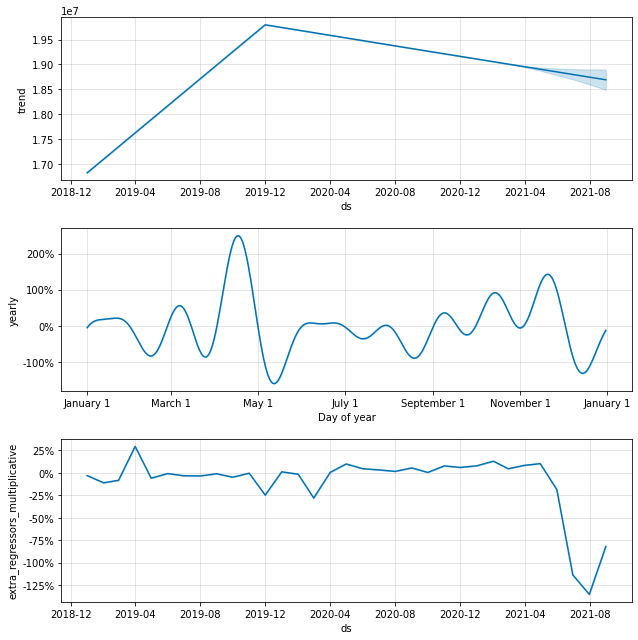

In [ ]:
future['active_businesses'] = mesa_df_thirdparty['active_businesses']
future['total_devices_seen'] = mesa_df_thirdparty['total_devices_seen']
future['Visitor_visits_diff'] = mesa_df_thirdparty['Visitor_visits_diff']

forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()


Interpreting the regressor coefficients

In [ ]:
from fbprophet.utilities import regressor_coefficients


In [ ]:
regressor_coefficients(model)

The Center column saves the mean value of the pre-standardized regressor. If the regressor wasnt standardized, then the value would be zero. The ceof column determines the expected value of the coefficient. IF Active_businesses was .0122, then the coefficient tells us that for every degree higher than the center, the expected effect on sales tax revenue is 1.2% increase. 

In [ ]:
from fbprophet.plot import plot_forecast_component
fig, axes = plt.subplots(len(regressor_coefficients(model)), figsize = (10,15))

for i, regressor in enumerate(
    regressor_coefficients(model)['regressor']):
    plot_forecast_component(model,
                            forecast,
                            regressor,
                            axes[i])
    
plt.show()

Addiitonal regressors in prophet are always modeled as a linear realtionship. https://stackoverflow.com/questions/66809881/fbprophet-understanding-regressor-impact-on-multivariate-forecast

Testing the accuracy:

In [ ]:
x_tst_forecast = model.predict(test_df_meza)
x_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
0,2021-04-01,1.661381e+07,1.642871e+07,1.679024e+07
1,2021-05-01,1.964687e+07,1.947362e+07,1.982968e+07
2,2021-06-01,1.530228e+07,1.510150e+07,1.549509e+07
3,2021-07-01,-3.158529e+06,-3.343882e+06,-2.988220e+06
4,2021-08-01,-6.805807e+06,-7.000779e+06,-6.611385e+06
5,2021-09-01,3.181203e+06,2.990632e+06,3.374338e+06


In [ ]:
test_df_meza

,ds,active_businesses,total_devices_seen,Visitor_visits_diff,y
27,2021-04,161.0,49049039.0,2921.0,23241683.63
28,2021-05,158.0,47795706.0,3622.0,22605975.25
29,2021-06,134.0,82188010.0,2509.0,23661927.82
30,2021-07,267.0,260500504.0,3368.0,22512287.08
31,2021-08,291.0,320992862.0,9817.0,22845875.08
32,2021-09,183.0,204319986.0,6656.0,23666698.18


In [ ]:
f, ax = plt.subplots(14, 5)
f.set_figheight(5)
f.set_figwidth(15)

#Plotting the actual values
test_df_meza.plot(kind = 'line', x = 'ds', y = 'y', color = 'red', label = 'Test', ax = ax)

x_tst_forecast.plot(kind = 'line', x = 'ds', y = 'yhat', color = 'green', label = 'Forecast', ax = ax)
plt.title('Forecast on the original mesa Model including Regressors(Active Bussinesses, Total Devices Seen)')
plt.show()


In [ ]:
MAPE_with_reg = mean_absoluter_percentage_error(test_df_meza['y'], x_tst_forecast['yhat'])
print('MAPE score with added regressors: ', MAPE_with_reg )

#SafeGraph(using Maripoca County data)

In [ ]:
safe_graph_df = pd.read_csv('Safegraph_AZ 2.csv')
safe_graph_df.head()


,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


In [ ]:
safe_graph_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56715 entries, 0 to 56714
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   56715 non-null  object 
 1   state_id                 56715 non-null  int64  
 2   county_id                56715 non-null  int64  
 3   county_name              56715 non-null  object 
 4   census_tract_id          56715 non-null  int64  
 5   census_tract_centroid    56715 non-null  object 
 6   naics_category           55480 non-null  object 
 7   date_range_start         55199 non-null  object 
 8   date_range_end           55199 non-null  object 
 9   raw_visit_counts         55199 non-null  float64
 10  raw_visitor_counts       55199 non-null  float64
 11  active_businesses        56714 non-null  float64
 12  total_devices_seen       55199 non-null  float64
 13  yago_date_range_start    32284 non-null  object 
 14  yago_date_range_end   

In [ ]:
safe_graph_df.describe()

,state_id,county_id,census_tract_id,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen
count,56715.000000,56715.000000,5.671500e+04,55199.000000,55199.000000,56714.000000,5.519900e+04,32284.000000,32284.000000,32284.000000,3.228400e+04
mean,4.000494,4015.352834,4.015603e+09,334.082121,231.458088,7.451476,2.801588e+06,335.321367,232.824216,5.820344,2.131060e+06
std,0.117573,117.610948,1.176072e+08,1343.925695,978.915118,29.629335,5.390573e+06,1339.003468,955.354490,8.609128,3.184377e+06
min,4.000000,4001.000000,4.001943e+09,1.000000,1.000000,1.000000,1.486200e+05,1.000000,1.000000,1.000000,1.971230e+05
25%,4.000000,4013.000000,4.013108e+09,15.000000,10.000000,1.000000,4.323380e+05,18.000000,11.000000,1.000000,4.192130e+05
50%,4.000000,4013.000000,4.013422e+09,61.000000,37.000000,3.000000,1.143473e+06,68.000000,42.000000,3.000000,1.001535e+06
75%,4.000000,4019.000000,4.019003e+09,255.000000,164.000000,7.000000,2.859360e+06,268.000000,171.000000,7.000000,2.429724e+06
max,32.000000,32003.000000,3.200301e+10,100835.000000,72702.000000,3511.000000,1.568253e+08,99236.000000,69108.000000,152.000000,5.999698e+07


In [ ]:
filter_maripoca = safe_graph_df['county_name'] == 'Maricopa County'
safe_graph_df_maripoca = safe_graph_df[filter_maripoca]
safe_graph_df_maripoca.head()

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


In [ ]:
safe_graph_df_maripoca['date_range_start'] = pd.to_datetime(safe_graph_df_maripoca['date_range_start'])
safe_graph_df_maripoca.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaT,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaT,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaT,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaT,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaT,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA


In [ ]:
safe_graph_df_maripoca.shape

(34483, 20)

In [ ]:
safe_graph_df_maripoca[(safe_graph_df_maripoca['date_range_end'].isnull()) | (safe_graph_df_maripoca['date_range_start'].isnull())] 

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,AZ,4,4013,Maricopa County,4013815400,POINT (-111.75 33.29),Utilities,NaT,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013815400-Utilities-NA
1,AZ,4,4013,Maricopa County,4013107500,POINT (-112.07 33.52),NaN,NaT,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013107500--NA
2,AZ,4,4013,Maricopa County,4013104224,POINT (-112.18 33.6),Arts,NaT,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013104224-Arts-NA
3,AZ,4,4013,Maricopa County,4013092708,POINT (-112.26 33.56),NaN,NaT,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013092708--NA
4,AZ,4,4013,Maricopa County,4013816900,POINT (-111.61 33.26),Wholesale Trade,NaT,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013816900-Wholesale Trade-NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53847,AZ,4,4013,Maricopa County,4013030402,POINT (-111.94 33.86),Accommodation and Food Services,NaT,NaN,NaN,NaN,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013030402-Accommodation and Food Services-NA
54445,AZ,4,4013,Maricopa County,4013616600,POINT (-112.09 33.66),Professional,NaT,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013616600-Professional-NA
55216,AZ,4,4013,Maricopa County,4013616600,POINT (-112.09 33.66),Real Estate and Rental and Leasing,NaT,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013616600-Real Estate and Rental and Leasing-NA
55841,AZ,4,4013,Maricopa County,4013619100,POINT (-112.06 33.64),Information,NaT,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04013619100-Information-NA


In [ ]:
safe_graph_df_maripoca.isnull()/safe_graph_df_maripoca.shape[0]

,region,state_id,county_id,county_name,census_tract_id,census_tract_centroid,naics_category,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,yago_date_range_start,yago_date_range_end,yago_raw_visit_counts,yago_raw_visitor_counts,yago_active_businesses,yago_total_devices_seen,rowkey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000029,0.000029,0.000029,0.000029,0.000000,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000029,0.000029,0.000029,0.000029,0.000000,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000029,0.000029,0.000029,0.000029,0.000000,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56702,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56703,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56705,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56710,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
safe_graph_df_maripoca = safe_graph_df_maripoca[~safe_graph_df_maripoca['date_range_start'].isnull()]

In [ ]:
safe_graph_df_maripoca.shape

(33603, 20)

In [ ]:
safe_graph_df_maripoca = safe_graph_df_maripoca[['date_range_start', 'raw_visit_counts', 'raw_visitor_counts',  'active_businesses', 'total_devices_seen']]


In [ ]:
safe_graph_df_maripoca['Date_parsed'] = safe_graph_df_maripoca['date_range_start'].astype(str).str[:10]
safe_graph_df_maripoca.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed
11,2021-10-04,27.0,17.0,2.0,2204676.0,2021-10-04
15,2019-01-07,7.0,4.0,1.0,392695.0,2019-01-07
17,2019-04-15,2.0,2.0,1.0,406295.0,2019-04-15
19,2019-08-19,3832.0,3062.0,5.0,1931825.0,2019-08-19
20,2019-10-07,52.0,20.0,2.0,747520.0,2019-10-07


In [ ]:
safe_graph_df_maripoca['month'] = safe_graph_df_maripoca['Date_parsed'].astype(str).str[5:7]
safe_graph_df_maripoca.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed,month
11,2021-10-04,27.0,17.0,2.0,2204676.0,2021-10-04,10
15,2019-01-07,7.0,4.0,1.0,392695.0,2019-01-07,01
17,2019-04-15,2.0,2.0,1.0,406295.0,2019-04-15,04
19,2019-08-19,3832.0,3062.0,5.0,1931825.0,2019-08-19,08
20,2019-10-07,52.0,20.0,2.0,747520.0,2019-10-07,10


In [ ]:
safe_graph_df_maripoca['year'] = safe_graph_df_maripoca['Date_parsed'].astype(str).str[:4]
safe_graph_df_maripoca.head()

,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed,month,year
11,2021-10-04,27.0,17.0,2.0,2204676.0,2021-10-04,10,2021
15,2019-01-07,7.0,4.0,1.0,392695.0,2019-01-07,01,2019
17,2019-04-15,2.0,2.0,1.0,406295.0,2019-04-15,04,2019
19,2019-08-19,3832.0,3062.0,5.0,1931825.0,2019-08-19,08,2019
20,2019-10-07,52.0,20.0,2.0,747520.0,2019-10-07,10,2019


In [ ]:
safe_graph_df_maripoca['Year-Month'] = safe_graph_df_maripoca['year'].astype(str) + '-' + safe_graph_df_maripoca['month'].astype(str)
safe_graph_df_maripoca.head()


,date_range_start,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Date_parsed,month,year,Year-Month
11,2021-10-04,27.0,17.0,2.0,2204676.0,2021-10-04,10,2021,2021-10
15,2019-01-07,7.0,4.0,1.0,392695.0,2019-01-07,01,2019,2019-01
17,2019-04-15,2.0,2.0,1.0,406295.0,2019-04-15,04,2019,2019-04
19,2019-08-19,3832.0,3062.0,5.0,1931825.0,2019-08-19,08,2019,2019-08
20,2019-10-07,52.0,20.0,2.0,747520.0,2019-10-07,10,2019,2019-10


In [ ]:
agg_monthly_sf = safe_graph_df_maripoca.groupby('Year-Month', as_index = False)[['raw_visit_counts', 'raw_visitor_counts',  'active_businesses', 'total_devices_seen']].sum()
agg_monthly_sf.head()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
0,2019-01,355345.0,236404.0,5579.0,2.274760e+09
1,2019-02,377698.0,240679.0,5012.0,2.136783e+09
2,2019-03,397765.0,258605.0,5210.0,2.197045e+09
3,2019-04,537945.0,355273.0,6493.0,2.689396e+09
4,2019-05,524096.0,369295.0,5369.0,2.036505e+09


In [ ]:
agg_monthly_sf.sort_values('Year-Month')


,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
0,2019-01,355345.0,236404.0,5579.0,2.274760e+09
1,2019-02,377698.0,240679.0,5012.0,2.136783e+09
2,2019-03,397765.0,258605.0,5210.0,2.197045e+09
3,2019-04,537945.0,355273.0,6493.0,2.689396e+09
4,2019-05,524096.0,369295.0,5369.0,2.036505e+09
5,2019-06,374805.0,265780.0,4925.0,1.788834e+09
6,2019-07,438126.0,310115.0,6374.0,2.184986e+09
7,2019-08,391753.0,271021.0,5274.0,1.988503e+09
8,2019-09,453820.0,304158.0,6215.0,2.586131e+09
9,2019-10,442948.0,306650.0,5007.0,1.773939e+09


In [ ]:
agg_monthly_sf = agg_monthly_sf[:-4]
agg_monthly_sf.tail()


,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen
28,2021-05,360546.0,251709.0,5818.0,1.770374e+09
29,2021-06,293749.0,214709.0,4912.0,2.363541e+09
30,2021-07,309603.0,223621.0,5221.0,5.064703e+09
31,2021-08,408653.0,268617.0,6089.0,6.703265e+09
32,2021-09,402286.0,272948.0,5933.0,6.520523e+09


In [ ]:
#extracting the difference between visitor counts and visit counts to see if we can potentially use this column as a regressor(need to look at correlation later)
agg_monthly_sf['Visitor_visits_diff'] = agg_monthly_sf['raw_visit_counts'] - agg_monthly_sf['raw_visitor_counts']
agg_monthly_sf

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Visitor_visits_diff
0,2019-01,355345.0,236404.0,5579.0,2.274760e+09,118941.0
1,2019-02,377698.0,240679.0,5012.0,2.136783e+09,137019.0
2,2019-03,397765.0,258605.0,5210.0,2.197045e+09,139160.0
3,2019-04,537945.0,355273.0,6493.0,2.689396e+09,182672.0
4,2019-05,524096.0,369295.0,5369.0,2.036505e+09,154801.0
5,2019-06,374805.0,265780.0,4925.0,1.788834e+09,109025.0
6,2019-07,438126.0,310115.0,6374.0,2.184986e+09,128011.0
7,2019-08,391753.0,271021.0,5274.0,1.988503e+09,120732.0
8,2019-09,453820.0,304158.0,6215.0,2.586131e+09,149662.0
9,2019-10,442948.0,306650.0,5007.0,1.773939e+09,136298.0


##Joining the dataframes

In [ ]:

mesa_df_thirdparty = pd.merge(agg_monthly_sf, meza_total_monthly, on="Year-Month")
mesa_df_thirdparty.head()


,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Visitor_visits_diff,Amount
0,2019-01,355345.0,236404.0,5579.0,2.274760e+09,118941.0,14774708.77
1,2019-02,377698.0,240679.0,5012.0,2.136783e+09,137019.0,14749561.39
2,2019-03,397765.0,258605.0,5210.0,2.197045e+09,139160.0,19679245.72
3,2019-04,537945.0,355273.0,6493.0,2.689396e+09,182672.0,17626483.23
4,2019-05,524096.0,369295.0,5369.0,2.036505e+09,154801.0,17902539.93


In [ ]:
mesa_df_thirdparty.dtypes


Year-Month              object
raw_visit_counts       float64
raw_visitor_counts     float64
active_businesses      float64
total_devices_seen     float64
Visitor_visits_diff    float64
Amount                 float64
dtype: object

In [ ]:
corr = mesa_df_thirdparty.select_dtypes('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Visitor_visits_diff,Amount
raw_visit_counts,1.000000,0.992038,0.622436,0.281445,0.969792,-0.071776
raw_visitor_counts,0.992038,1.000000,0.635584,0.259351,0.931349,-0.023526
active_businesses,0.622436,0.635584,1.000000,0.365231,0.568569,0.134705
total_devices_seen,0.281445,0.259351,0.365231,1.000000,0.311395,0.323685
Visitor_visits_diff,0.969792,0.931349,0.568569,0.311395,1.000000,-0.161954
Amount,-0.071776,-0.023526,0.134705,0.323685,-0.161954,1.000000


In [ ]:
mesa_df_thirdparty_orig = mesa_df_thirdparty.copy()
mesa_df_thirdparty_orig.head()

,Year-Month,raw_visit_counts,raw_visitor_counts,active_businesses,total_devices_seen,Visitor_visits_diff,Amount
0,2019-01,355345.0,236404.0,5579.0,2.274760e+09,118941.0,14774708.77
1,2019-02,377698.0,240679.0,5012.0,2.136783e+09,137019.0,14749561.39
2,2019-03,397765.0,258605.0,5210.0,2.197045e+09,139160.0,19679245.72
3,2019-04,537945.0,355273.0,6493.0,2.689396e+09,182672.0,17626483.23
4,2019-05,524096.0,369295.0,5369.0,2.036505e+09,154801.0,17902539.93


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet


In [ ]:
#split the data into train and test datasets
mesa_df_thirdparty_orig = mesa_df_thirdparty_orig.drop(['raw_visit_counts', 'raw_visitor_counts'], axis = 1)
mesa_df_thirdparty_orig

,Year-Month,active_businesses,total_devices_seen,Visitor_visits_diff,Amount
0,2019-01,5579.0,2.274760e+09,118941.0,14774708.77
1,2019-02,5012.0,2.136783e+09,137019.0,14749561.39
2,2019-03,5210.0,2.197045e+09,139160.0,19679245.72
3,2019-04,6493.0,2.689396e+09,182672.0,17626483.23
4,2019-05,5369.0,2.036505e+09,154801.0,17902539.93
5,2019-06,4925.0,1.788834e+09,109025.0,17541152.38
6,2019-07,6374.0,2.184986e+09,128011.0,17439965.03
7,2019-08,5274.0,1.988503e+09,120732.0,18027104.61
8,2019-09,6215.0,2.586131e+09,149662.0,17801939.86
9,2019-10,5007.0,1.773939e+09,136298.0,18022331.84


In [ ]:
mesa_df_thirdparty_orig = mesa_df_thirdparty_orig.rename(columns={"Amount": "y", "Year-Month": "ds"})
mesa_df_thirdparty_orig

,ds,active_businesses,total_devices_seen,Visitor_visits_diff,y
0,2019-01,5579.0,2.274760e+09,118941.0,14774708.77
1,2019-02,5012.0,2.136783e+09,137019.0,14749561.39
2,2019-03,5210.0,2.197045e+09,139160.0,19679245.72
3,2019-04,6493.0,2.689396e+09,182672.0,17626483.23
4,2019-05,5369.0,2.036505e+09,154801.0,17902539.93
5,2019-06,4925.0,1.788834e+09,109025.0,17541152.38
6,2019-07,6374.0,2.184986e+09,128011.0,17439965.03
7,2019-08,5274.0,1.988503e+09,120732.0,18027104.61
8,2019-09,6215.0,2.586131e+09,149662.0,17801939.86
9,2019-10,5007.0,1.773939e+09,136298.0,18022331.84


In [ ]:
end_date = '2021-03'
mask1 = (mesa_df_thirdparty_orig['ds'] <= end_date)
mask2 = (mesa_df_thirdparty_orig['ds'] > end_date)

In [ ]:
train_df_mesa = mesa_df_thirdparty_orig.loc[mask1]
test_df_meza = mesa_df_thirdparty_orig.loc[mask2]
print("Train Shape: ", train_df_mesa.shape)
print("Test Shape: ", test_df_meza.shape)

Train Shape:  (27, 5)
Test Shape:  (6, 5)


In [ ]:
model = Prophet(seasonality_mode = 'multiplicative')
# model.add_regressor('active_businesses')
model.add_regressor('total_devices_seen')
# model.add_regressor('Visitor_visits_diff')
model.fit(train_df_mesa)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [ ]:
future = model.make_future_dataframe(periods = 6, freq = 'M')


In [ ]:
# future['active_businesses'] = mesa_df_thirdparty['active_businesses']
future['total_devices_seen'] = mesa_df_thirdparty['total_devices_seen']
# future['Visitor_visits_diff'] = mesa_df_thirdparty['Visitor_visits_diff']

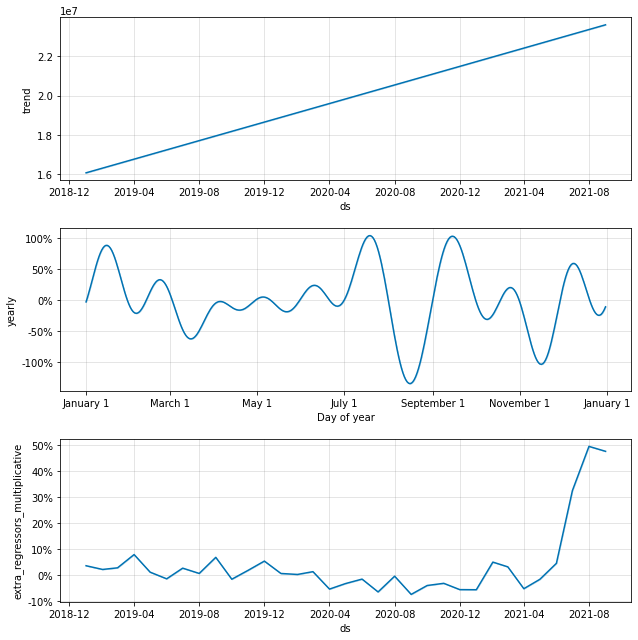

In [ ]:
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
from fbprophet.utilities import regressor_coefficients
regressor_coefficients(model)


,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,total_devices_seen,multiplicative,1.925350e+09,1.038101e-10,1.038101e-10,1.038101e-10


In [ ]:
corr = mesa_df_thirdparty_orig.select_dtypes('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

,active_businesses,total_devices_seen,Visitor_visits_diff,y
active_businesses,1.000000,0.365231,0.568569,0.134705
total_devices_seen,0.365231,1.000000,0.311395,0.323685
Visitor_visits_diff,0.568569,0.311395,1.000000,-0.161954
y,0.134705,0.323685,-0.161954,1.000000
